In [2]:
import torch

# Get the PyTorch version
torch_version = torch.__version__

# Check if CUDA is available and get its version
cuda_version = torch.version.cuda if torch.cuda.is_available() else "CUDA not available"

torch_version, cuda_version


('2.4.1', '11.8')

In [4]:
#conda install -c dglteam dgl
#pip install plotly
#pip install xgi
#pip install python-louvain

In [5]:
import dgl

## Graph Statistics

In [8]:
hetero_graph = dgl.load_graphs('data/graph_building/london_10_landmarks/hetergenous_graph/0123_10_landmarks_6_edges_graph.dgl')[0][0]

In [9]:
#import geopandas as gpd
import numpy as np
import pandas as pd
#SVI_landmark_edges = gpd.read_file('data/graph_building/london_10_landmarks/hetergenous_graph/street_level_nodes_with_attributes.gpkg')
SVI_landmark_edges = pd.read_csv('data/graph_building/london_10_landmarks/hetergenous_graph/street_level_nodes_with_attributes.csv')

#SVI_landmark_edges .loc[SVI_landmark_edges['shortest_distance']==np.inf, 'shortest_distance'] = 100
SVI_landmark_edges.columns = ['Unnamed: 0', 'node_id', 'latitude', 'longitude', 'visibility',
       'landmark', 'geometry', 'distance_to_landmark', 'proximity',
       'building_count', 'area_density', 'shortest_distance']
SVI_landmark_edges.head()

,Unnamed: 0,node_id,latitude,longitude,visibility,landmark,geometry,distance_to_landmark,proximity,building_count,area_density,shortest_distance
0,0,virtual_100009526,182064.117851,530293.357058,-1,big_ben,POINT (530293.3570582942 182064.11785114277),2426.003086,0,77,44.9,7.384657
1,1,virtual_100009526,182064.117851,530293.357058,-1,gherkin,POINT (530293.3570582942 182064.11785114277),3117.292647,0,77,44.9,7.384657
2,2,virtual_100009526,182064.117851,530293.357058,-1,london_eye,POINT (530293.3570582942 182064.11785114277),2152.807401,0,77,44.9,7.384657
3,3,virtual_100009526,182064.117851,530293.357058,-1,st_paul,POINT (530293.3570582942 182064.11785114277),1989.965447,0,77,44.9,7.384657
4,4,virtual_100009526,182064.117851,530293.357058,-1,tower_bridge,POINT (530293.3570582942 182064.11785114277),3813.838434,0,77,44.9,7.384657


In [10]:
SVI_landmark_edges

,Unnamed: 0,node_id,latitude,longitude,visibility,landmark,geometry,distance_to_landmark,proximity,building_count,area_density,shortest_distance
0,0,virtual_100009526,182064.117851,530293.357058,-1,big_ben,POINT (530293.3570582942 182064.11785114277),2426.003086,0,77,44.9,7.384657
1,1,virtual_100009526,182064.117851,530293.357058,-1,gherkin,POINT (530293.3570582942 182064.11785114277),3117.292647,0,77,44.9,7.384657
2,2,virtual_100009526,182064.117851,530293.357058,-1,london_eye,POINT (530293.3570582942 182064.11785114277),2152.807401,0,77,44.9,7.384657
3,3,virtual_100009526,182064.117851,530293.357058,-1,st_paul,POINT (530293.3570582942 182064.11785114277),1989.965447,0,77,44.9,7.384657
4,4,virtual_100009526,182064.117851,530293.357058,-1,tower_bridge,POINT (530293.3570582942 182064.11785114277),3813.838434,0,77,44.9,7.384657
...,...,...,...,...,...,...,...,...,...,...,...,...
354615,354615,E21yLcuPQFfru_q7MsM86Q,182020.488628,532201.348947,0,the_shard,POINT (532201.3489466362 182020.48862825328),2001.178334,0,21,37.1,4.060284
354616,354616,E21yLcuPQFfru_q7MsM86Q,182020.488628,532201.348947,0,london_tower,POINT (532201.3489466362 182020.48862825328),2041.510859,0,21,37.1,4.060284
354617,354617,E21yLcuPQFfru_q7MsM86Q,182020.488628,532201.348947,0,tate_modern,POINT (532201.3489466362 182020.48862825328),1544.880168,0,21,37.1,4.060284
354618,354618,E21yLcuPQFfru_q7MsM86Q,182020.488628,532201.348947,0,belfast,POINT (532201.3489466362 182020.48862825328),1966.944767,0,21,37.1,4.060284


In [11]:
# Reverse the landmark_ids dictionary to get index-to-name mapping
landmark_ids = {q: idx for idx, q in enumerate(SVI_landmark_edges.landmark.unique())}
index_to_landmark_name = {idx: name for name, idx in landmark_ids.items()}


### Degree of landmarks based on different edges

In [12]:
import pandas as pd
import torch

# Assuming `hetero_graph` and `index_to_landmark_name` are already defined

# Edge types where landmarks are the destination
landmark_edge_types_in = [
    ('hyperedge', 'connects', 'landmark'),
]

# Prepare data dictionary with landmark names
degree_data = {'landmark_name': [index_to_landmark_name[i] for i in range(hetero_graph.num_nodes('landmark'))]}

# In-Degree Calculation (Unweighted)
for srctype, etype, dsttype in landmark_edge_types_in:
    in_deg = hetero_graph.in_degrees(hetero_graph.nodes('landmark'), etype=etype)
    degree_data[f'{etype}_in'] = in_deg.tolist()

# Edge types where landmarks are the source
landmark_edge_types_out = [
    ('landmark', 'visibility', 'svi_location'),
    ('landmark', 'proximity', 'svi_location'),
    ('landmark', 'seen_together', 'hyperedge'),
]

# Out-Degree Calculation (Unweighted)
for srctype, etype, dsttype in landmark_edge_types_out:
    out_deg = hetero_graph.out_degrees(hetero_graph.nodes('landmark'), etype=etype)
    degree_data[f'{etype}_out'] = out_deg.tolist()

# Adding both weighted and unweighted degree for 'see_from_location'
landmark_nodes = hetero_graph.nodes('landmark')

# Weighted In-Degree and Out-Degree
weighted_in_deg = []
weighted_out_deg = []

# Aggregate weights for in-degree and out-degree
for node in landmark_nodes.tolist():
    in_edges = hetero_graph.in_edges(node, form='eid', etype='see_from_location')
    out_edges = hetero_graph.out_edges(node, form='eid', etype='see_from_location')
    
    in_weight = hetero_graph.edges['see_from_location'].data['weight'][in_edges].sum().item() if len(in_edges) > 0 else 0
    out_weight = hetero_graph.edges['see_from_location'].data['weight'][out_edges].sum().item() if len(out_edges) > 0 else 0
    
    weighted_in_deg.append(in_weight)
    weighted_out_deg.append(out_weight)

# Add weighted degrees to the data dictionary
degree_data['see_from_location_weighted_in'] = weighted_in_deg
degree_data['see_from_location_weighted_out'] = weighted_out_deg

# Convert to DataFrame
degree_df = pd.DataFrame(degree_data)

# Ensure all numeric columns are integer type
for col in degree_df.columns:
    if col != 'landmark_name':  # Exclude non-numeric columns
        degree_df[col] = degree_df[col].astype(int)
degree_df

,landmark_name,connects_in,visibility_out,proximity_out,seen_together_out,see_from_location_weighted_in,see_from_location_weighted_out
0,big_ben,32,0,168,32,9,15
1,gherkin,39,0,209,39,35,1
2,london_eye,48,0,48,48,15,9
3,st_paul,27,0,250,27,2,6
4,tower_bridge,48,0,61,48,28,29
5,the_shard,132,0,179,132,49,5
6,london_tower,32,0,137,32,13,50
7,tate_modern,60,0,110,60,8,7
8,belfast,2,0,37,2,0,29
9,walkie_talkie,46,0,148,46,22,30


### Degreee of landamarks based on direct visible nodes and their neighbours

In [13]:
import dgl
import torch
import pandas as pd
from collections import defaultdict
from tqdm import tqdm
import pandas as pd
from itertools import combinations

In [14]:
from tqdm import tqdm
import pandas as pd

# Step 1: Reverse mapping to get landmark names
index_to_landmark_name = {idx: name for name, idx in landmark_ids.items()}

# Prepare data storage
degree_data = {'landmark_name': [index_to_landmark_name[i] for i in range(hetero_graph.num_nodes('landmark'))]}

# Loop through each landmark with tqdm progress bar
for landmark_id in tqdm(range(hetero_graph.num_nodes('landmark')), desc="Calculating degrees"):
    # Step 1: Direct visibility degree (svi_location → landmark)
    direct_svi_neighbors = hetero_graph.predecessors(landmark_id, etype='visibility')  # Incoming nodes
    direct_svi_list = direct_svi_neighbors.tolist()
    direct_degree = len(direct_svi_list)

    # Step 2: 2-Step Degree (visibility + SVI_connectivity)
    second_svi_neighbors = set()
    for svi_id in direct_svi_list:
        connected_svi = hetero_graph.successors(svi_id, etype='SVI_connectivity')  # Find connected SVI nodes
        second_svi_neighbors.update(connected_svi.tolist())

    # Combine direct and second-step SVI nodes
    two_step_degree = len(set(direct_svi_list).union(second_svi_neighbors))

    # Store the results
    degree_data['direct_degree (visibility)'] = degree_data.get('direct_degree (visibility)', []) + [direct_degree]
    degree_data['2_step_degree (visibility + SVI_connectivity)'] = degree_data.get('2_step_degree (visibility + SVI_connectivity)', []) + [two_step_degree]

# Convert to DataFrame
degree_df = pd.DataFrame(degree_data)

# Display the result
degree_df 

Calculating degrees: 100%|█████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 54.33it/s]


,landmark_name,direct_degree (visibility),2_step_degree (visibility + SVI_connectivity)
0,big_ben,141,366
1,gherkin,305,771
2,london_eye,142,392
3,st_paul,159,436
4,tower_bridge,95,220
5,the_shard,464,1038
6,london_tower,46,115
7,tate_modern,192,467
8,belfast,4,8
9,walkie_talkie,71,187


## Inter-visibility between landmarks

### edge - seen from location 

In [15]:
import dgl
import networkx as nx
import matplotlib.pyplot as plt

# Create NetworkX graph
G = nx.DiGraph()

# Reverse mapping: index to landmark name
index_to_landmark_name = {idx: name for name, idx in landmark_ids.items()}

# 1️⃣ Extract seen_together relationships (Landmark → Hyperedge → Landmark)
# Get all landmark nodes
landmark_nodes = hetero_graph.nodes('landmark')

# Iterate through landmark nodes to find corresponding seen_together edges
for landmark_id in landmark_nodes.tolist():
    # Find hyperedges
    hyperedge_neighbors = hetero_graph.successors(landmark_id, etype='seen_together')
    
    # Find other landmarks connected to the hyperedge
    for hyperedge in hyperedge_neighbors.tolist():
        connected_landmarks = hetero_graph.successors(hyperedge, etype='connects')
        
        # Add edges between landmarks (excluding self-loops, default weight 1)
        for other_landmark_id in connected_landmarks.tolist():
            if landmark_id != other_landmark_id:
                G.add_edge(index_to_landmark_name[landmark_id],
                           index_to_landmark_name[other_landmark_id],
                           relation='seen_together',
                           weight=1)  # default weight

# 2️⃣ Extract see_from_location relationships (Landmark → Landmark)
# Extract all 'see_from_location' edge IDs
see_from_location_edges = hetero_graph.edges(etype='see_from_location')

# Get edge weights (assuming 'weight' attribute exists)
edge_weights = hetero_graph.edges['see_from_location'].data.get('weight', None)

# Iterate through edges and add to NetworkX graph
for idx in range(len(see_from_location_edges[0])):
    src = see_from_location_edges[0][idx].item()  # source node ID
    dst = see_from_location_edges[1][idx].item()  # target node ID
    
    # Get edge weight, default to 1 if not present
    weight = edge_weights[idx].item() if edge_weights is not None else 1
    
    # Add weighted edge
    G.add_edge(index_to_landmark_name[src],
               index_to_landmark_name[dst],
               relation='see_from_location',
               weight=weight)


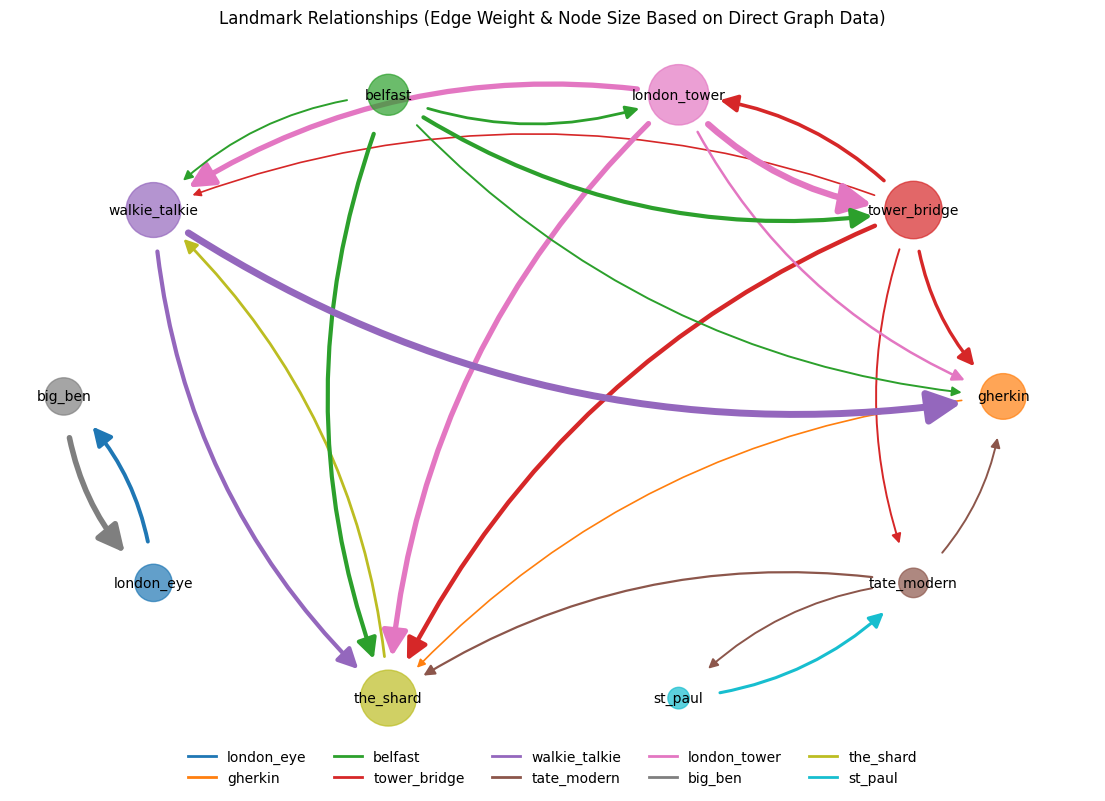

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from collections import Counter

# 1️⃣ Set node layout
#pos = nx.spring_layout(G, seed=4, k = 0.2, iterations = 5000)
#pos = nx.random_layout(G)
#pos = nx.kamada_kawai_layout(G)
#pos = nx.circular_layout(G)
#pos = nx.spiral_layout(G)
pos = nx.shell_layout(G)

# 2️⃣ Get edge weights (directly from graph data)
edge_weights = {}
node_in_weights = Counter()
node_out_weights = Counter()

# Randomly assign colors to distinguish different source nodes
unique_sources = {u for u, v, d in G.edges(data=True) if d['relation'] == 'see_from_location'}
source_colors = {node: plt.cm.tab20(i / len(unique_sources)) for i, node in enumerate(unique_sources)}

# 3️⃣ Count edge and node weights
for u, v, d in G.edges(data=True):
    if d['relation'] == 'see_from_location':  # Only process see_from_location
        weight = d.get('weight', 1)  # Default weight is 1 if not specified
        edge_weights[(u, v)] = weight * 1
        node_out_weights[u] += weight
        node_in_weights[v] += weight

# 4️⃣ Assign colors to nodes (matching their outgoing edges)
node_colors = []
for node in G.nodes():
    if node in node_out_weights and node_out_weights[node] > 0:
        # Get the color of the node's first outgoing edge
        outgoing_edge = next(((u, v) for u, v, d in G.edges(data=True) if u == node and d['relation'] == 'see_from_location'), None)
        if outgoing_edge:
            color = source_colors[outgoing_edge[0]]
        else:
            color = 'gray'
    else:
        color = 'gray'  # Nodes without outgoing edges use gray
    node_colors.append(color)

# 5️⃣ Calculate node sizes (based on in + out weight sum)
node_sizes = []
for node in G.nodes():
    total_weight = node_in_weights[node] + node_out_weights[node]
    node_sizes.append(1 + total_weight * 30)  # Base size + weight scaling

# 6️⃣ Draw the graph
plt.figure(figsize=(14, 10))

# Draw edges, color based on source node, width based on edge weight
for (u, v), weight in edge_weights.items():
    width = 1 + weight * 0.2  # Edge thickness based on weight
    color = source_colors[u]  # Color determined by source node

    # Use curved style for bidirectional edges
    connection_style = 'arc3,rad=0.2' if G.has_edge(v, u) else 'arc3,rad=0'

    # Draw edges (adjust arrow position to prevent node overlap)
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=[(u, v)],
        width=width,
        edge_color=[color],
        arrows=True,
        arrowstyle='-|>',       # Arrow style
        arrowsize=width*10,     # Adjust arrow size
        min_source_margin=30,   # Distance from source node
        min_target_margin=30,   # Distance from target node
        connectionstyle=connection_style
    )

# 7️⃣ Draw nodes, colors matching edges
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.7)

# 8️⃣ Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# 9️⃣ Create legend (flat at bottom)
legend_elements = [
    Line2D([0], [0], color=color, lw=2, label=f'{source}')
    for source, color in source_colors.items()
]

# Adjust subplot spacing to prevent legend overlap
plt.subplots_adjust(bottom=0.15)

# Set legend position and arrangement
plt.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05),
           ncol=5, frameon=False)  # Flat, 5 columns, no border

# 10️⃣ Display the graph
plt.title('Landmark Relationships (Edge Weight & Node Size Based on Direct Graph Data)')
plt.axis('off')
plt.show()


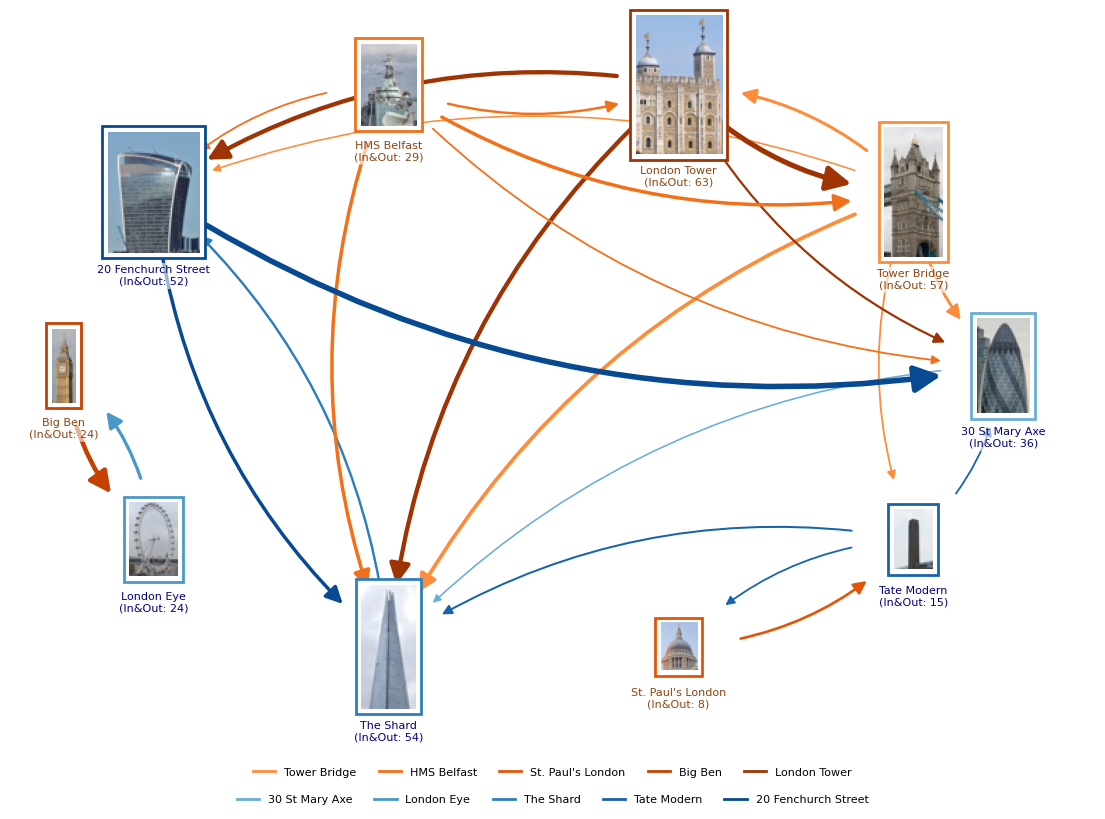

In [94]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from collections import Counter
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

query_images = {
    'big_ben': {
        'image': Image.open('data/global_quairys/london_quiery/big_ben.jpg').convert("RGB"),
        'name':'Big Ben',
        'height': 136 +50,  # Height in pixels
        'location': (51.50067742771776, -0.1245917078514397),  # (x, y) location in pixels
        'era': 'historical'  # Completed in 1859, historical landmark
    },
    'gherkin': {
        'image': Image.open('data/global_quairys/london_quiery/gherkin.jpg').convert("RGB"),
        'name':'30 St Mary Axe',
        'height': 180+150,
        'location': (51.514425676412266, -0.08034253877566065),
        'era': 'modern'  # Completed in 2004, modern landmark
    },
    'london_eye': {
        'image': Image.open('data/global_quairys/london_quiery/london_eye.jpg').convert("RGB"),
        'name':'London Eye',
        'height': 135+50,
        'location': (51.50325678772387, -0.11968602374317167),
        'era': 'modern'  # Completed in 2000, modern landmark
    },
    'st_paul': {
        'image': Image.open('data/global_quairys/london_quiery/st_paul.jpg').convert("RGB"),
        'name':'St. Paul\'s London',
        'height': 111+100,
        'location': (51.51372488153867, -0.09835669261103407),
        'era': 'historical'  # Completed in 1710, historical landmark
    },
    'tower_bridge': {
        'image': Image.open('data/global_quairys/london_quiery/tower_bridge.jpg').convert("RGB"),
        'name':'Tower Bridge',
        'height': 65+20,
        'location': (51.505286271502925, -0.07557582210691857),
        'era': 'historical'  # Completed in 1894, historical landmark
    },
    'the_shard': {
        'image': Image.open('data/global_quairys/london_quiery/the_shard.jpg').convert("RGB"),
        'name':'The Shard',
        'height': 310+190,
        'location': (51.50462497710506, -0.08652726915106525),
        'era': 'modern'  # Completed in 2012, modern landmark
    },
    'london_tower': {
        'image': Image.open('data/global_quairys/london_quiery/london_tower.jpg').convert("RGB"),
        'name':'London Tower',
        'height': 27+13,
        'location': (51.50814912539999, -0.07593857137065564),
        'era': 'historical'  # Built in 11th century, historical landmark
    },
    'tate_modern': {
        'image': Image.open('data/global_quairys/london_quiery/tate.jpg').convert("RGB"),
        'name':'Tate Modern',
        'height': 99+50,
        'location': (51.50790142258951, -0.0993475020370249),
        'era': 'modern'  # Opened as museum in 2000, modern landmark
    },
    'belfast': {
        'image': Image.open('data/global_quairys/london_quiery/belfast.jpg').convert("RGB"),
        'name':'HMS Belfast',
        'height': 30,
        'location': (51.50661247983305, -0.08137847973109241),
        'era': 'historical'  # Historical warship, historical landmark
    },
    'walkie_talkie': {
        'image': Image.open('data/global_quairys/london_quiery/walkie.jpg').convert("RGB"),
        'name':'20 Fenchurch Street',
        'height': 160+100,
        'location': (51.50661247983305, -0.08137847973109241),
        'era': 'modern'  # Completed in 2014, modern landmark
    }
}

# Define color schemes for historical and modern landmarks
historical_color_palette = plt.cm.Oranges  # Warm colors for historical buildings
modern_color_palette = plt.cm.Blues       # Cool colors for modern buildings

# Network Layout
pos = nx.shell_layout(G)

# Edge Weights and Node Attributes
edge_weights = {}
node_in_weights = Counter()
node_out_weights = Counter()

unique_sources = {u for u, v, d in G.edges(data=True) if d['relation'] == 'see_from_location'}

# Assign colors based on landmark era
source_colors = {}
historical_sources = [node for node in unique_sources if node in query_images and query_images[node]['era'] == 'historical']
modern_sources = [node for node in unique_sources if node in query_images and query_images[node]['era'] == 'modern']

# Assign warm colors to historical landmarks
for i, node in enumerate(historical_sources):
    source_colors[node] = historical_color_palette(0.5 + i / (len(historical_sources) * 2))  # Use darker colors

# Assign cool colors to modern landmarks
for i, node in enumerate(modern_sources):
    source_colors[node] = modern_color_palette(0.5 + i / (len(modern_sources) * 2))  # Use darker colors

# Assign gray to unclassified nodes
for node in unique_sources:
    if node not in source_colors:
        source_colors[node] = 'gray'

for u, v, d in G.edges(data=True):
    if d['relation'] == 'see_from_location':
        weight = d.get('weight', 1)
        edge_weights[(u, v)] = weight
        node_out_weights[u] += weight
        node_in_weights[v] += weight

# Node Sizes (Based on In + Out Degree Weights)
node_sizes = {}
node_total_weights = {}  # Store total weight for each node
for node in G.nodes():
    total_weight = node_in_weights[node] + node_out_weights[node]
    node_sizes[node] = 25 + total_weight * 1.2  # Node size used as image height
    node_total_weights[node] = total_weight  # Save total weight for label display

# Visualization
plt.figure(figsize=(14, 10))
ax = plt.gca()

# Replace Node Circles with Images (Add Boundary Color)
annotation_boxes = {}  # Store bounding boxes for label positioning

for node, (x, y) in pos.items():
    node_size = node_sizes.get(node, 50)  # Default size if missing

    # Check if node has an associated image
    if node in query_images:
        img_data = query_images[node]['image']

        # Resize image based on node size (used as image height)
        aspect_ratio = img_data.width / img_data.height
        new_width = int(node_size * aspect_ratio)
        img_resized = img_data.resize((new_width, int(node_size)))

        # Determine border color based on landmark era
        if node in source_colors:
            border_color = source_colors[node]
        else:
            # If node is not a source, choose color based on era
            era = query_images[node].get('era', 'unknown')
            if era == 'historical':
                border_color = historical_color_palette(0.7)
            elif era == 'modern':
                border_color = modern_color_palette(0.7)
            else:
                border_color = 'gray'

        # Add image to the plot with boundary
        imagebox = OffsetImage(img_resized, zoom=1)
        ab = AnnotationBbox(imagebox, (x, y), frameon=True,
                            bboxprops=dict(edgecolor=border_color, linewidth=2))
        ax.add_artist(ab)

        # Store the annotation box for label positioning
        annotation_boxes[node] = ab
    else:
        # Fallback: Draw circle if no image is available
        # Choose color based on whether node is a source and its era
        if node in unique_sources:
            node_color = source_colors[node]
        else:
            node_color = 'gray'
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=node_color, node_size=node_size)

# Draw Edges
for (u, v), weight in edge_weights.items():
    width = 1 + weight * 0.15
    color = source_colors.get(u, 'gray')
    connection_style = 'arc3,rad=0.2' if G.has_edge(v, u) else 'arc3,rad=0'

    nx.draw_networkx_edges(
        G, pos,
        edgelist=[(u, v)],
        width=width,
        edge_color=[color],
        arrows=True,
        arrowstyle='-|>',
        arrowsize=width * 10,
        min_source_margin=45,
        min_target_margin=45,
        connectionstyle=connection_style
    )

# Draw Labels (Below Bounding Box)
label_offset = 0.05  # Offset below the bounding box

for node, ab in annotation_boxes.items():
    # Get the bounding box for the node
    bbox = ab.get_window_extent(renderer=plt.gcf().canvas.get_renderer())

    # Convert the bottom of the bounding box to data coordinates
    inv = ax.transData.inverted()
    _, bottom_y = inv.transform((bbox.x0, bbox.y0))  # Bottom Y-coordinate in data space

    # Select label color based on landmark era
    if node in query_images:
        era = query_images[node].get('era', 'unknown')
        if era == 'historical':
            text_color = 'saddlebrown'  # Brown for historical landmarks
        elif era == 'modern':
            text_color = 'navy'  # Navy blue for modern landmarks
        else:
            text_color = 'black'
    else:
        text_color = 'black'

    # Get total weight for the node
    total_weight = node_total_weights.get(node, 0)
    
    # Add landmark name and total weight to label
    label_text = f"{query_images[node]['name'] if node in query_images else node}\n(In&Out: {int(total_weight)})"

    # Place the label just below the bounding box
    plt.text(
        pos[node][0],  # X-coordinate (center aligned)
        bottom_y - label_offset,  # Y-coordinate (just below the bounding box)
        s=label_text,
        fontsize=8,
        ha='center',  # Center horizontally
        va='top',     # Align the top of the text to the bottom of the box
        color=text_color,bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.6))

# Legend
# Create separate legends for historical and modern landmarks
historical_legend = [
    Line2D([0], [0], color=source_colors[source], lw=2, label=f'{query_images[source]["name"]}')
    for source in historical_sources
]

modern_legend = [
    Line2D([0], [0], color=source_colors[source], lw=2, label=f'{query_images[source]["name"]}')
    for source in modern_sources
]

# Adjust legend layout: historical landmarks on top, modern landmarks below
plt.subplots_adjust(bottom=0.2)  # Increase bottom space to accommodate two rows of legends

# Create two separate legends
historical_legend_artist = plt.legend(handles=historical_legend, loc='lower center', 
                                     bbox_to_anchor=(0.5, -0.12), ncol=5, frameon=False, fontsize=8,
                                    )

modern_legend_artist = plt.legend(handles=modern_legend, loc='lower center', 
                                 bbox_to_anchor=(0.5, -0.16), ncol=5, frameon=False,fontsize=8,
                                 )

# Add historical legend back to plot (since second legend overwrites first)
ax.add_artist(historical_legend_artist)

# Add era classification labels aligned with legends
#plt.figtext(0.02, 0.12, "Historical Landmarks (Before 1990)", fontsize=9, color='saddlebrown')
#plt.figtext(0.02, 0.08, "Modern Landmarks (After 1990)", fontsize=9, color='navy')

# Display Graph
plt.axis('off')

# Save image with dpi=300 and remove extra whitespace
plt.savefig("report\images\seen_from_locations_visualization.png", dpi=300, bbox_inches='tight')
plt.show()

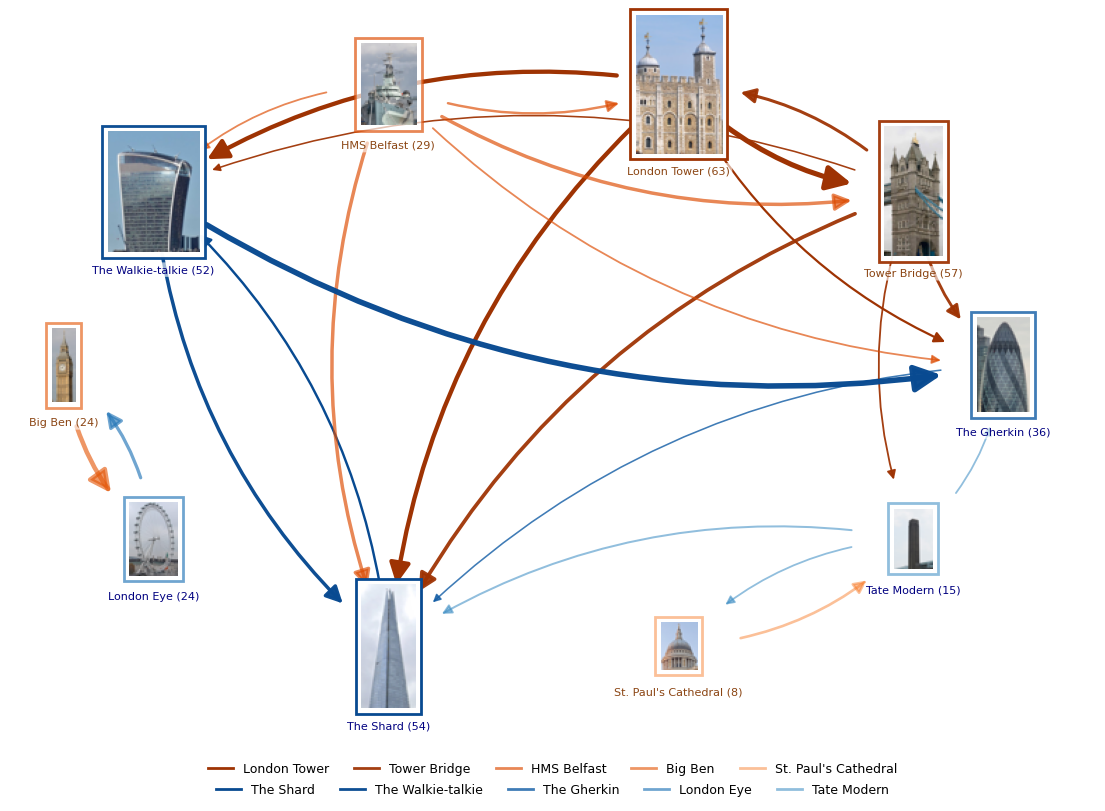

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from collections import Counter
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

query_images = {
    'big_ben': {
        'image': Image.open('data/global_quairys/london_quiery/big_ben.jpg').convert("RGB"),
        'name':'Big Ben',
        #'height': 500,  # Example height in pixels
        'height': 136 +50,  # Example height in pixels
        'location': (51.50067742771776, -0.1245917078514397),  # Example (x, y) location in pixels within the image
        'era': 'historical'  # Completed in 1859, historical landmark
    },
    'gherkin': {
        'image': Image.open('data/global_quairys/london_quiery/gherkin.jpg').convert("RGB"),
        'name':'The Gherkin',
        'height': 180+150,
        'location': (51.514425676412266, -0.08034253877566065),
        'era': 'modern'  # Completed in 2004, modern landmark
    },
    # Add more query images as needed
    'london_eye': {
        'image': Image.open('data/global_quairys/london_quiery/london_eye.jpg').convert("RGB"),
        'name':'London Eye',
        'height': 135+50,
        'location': (51.50325678772387, -0.11968602374317167),
        'era': 'modern'  # Completed in 2000, modern landmark
    },
    'st_paul': {
        'image': Image.open('data/global_quairys/london_quiery/st_paul.jpg').convert("RGB"),
        'name':'St. Paul\'s Cathedral',
        'height': 111+100,
        'location': (51.51372488153867, -0.09835669261103407),
        'era': 'historical'  # Completed in 1710, historical landmark
    },
    'tower_bridge': {
        'image': Image.open('data/global_quairys/london_quiery/tower_bridge.jpg').convert("RGB"),
        'name':'Tower Bridge',
        'height': 65+20,
        'location': (51.505286271502925, -0.07557582210691857),
        'era': 'historical'  # Completed in 1894, historical landmark
    },
    'the_shard': {
        'image': Image.open('data/global_quairys/london_quiery/the_shard.jpg').convert("RGB"),
        'name':'The Shard',
        'height': 310+190,
        'location': (51.50462497710506, -0.08652726915106525),
        'era': 'modern'  # Completed in 2012, modern landmark
    },
    'london_tower': {
        'image': Image.open('data/global_quairys/london_quiery/london_tower.jpg').convert("RGB"),
        'name':'London Tower',
        'height': 27+13,
        'location': (51.50814912539999, -0.07593857137065564),
        'era': 'historical'  # Built in 11th century, historical landmark
    },
    'tate_modern': {
        'image': Image.open('data/global_quairys/london_quiery/tate.jpg').convert("RGB"),
        'name':'Tate Modern',
        'height': 99+50,
        'location': (51.50790142258951, -0.0993475020370249),
        'era': 'modern'  # Opened as art gallery in 2000, modern landmark
    },
    'belfast': {
        'image': Image.open('data/global_quairys/london_quiery/belfast.jpg').convert("RGB"),
        'name':'HMS Belfast',
        'height': 30,
        'location': (51.50661247983305, -0.08137847973109241),
        'era': 'historical'  # Historical warship, historical landmark
    },
    'walkie_talkie': {
        'image': Image.open('data/global_quairys/london_quiery/walkie.jpg').convert("RGB"),
        'name':'The Walkie-talkie',
        'height': 160+100,
        'location': (51.50661247983305, -0.08137847973109241),
        'era': 'modern'  # Completed in 2014, modern landmark
    }
}

# Define color schemes for historical and modern landmarks
historical_color_palette = plt.cm.Oranges  # Warm colors for historical buildings
modern_color_palette = plt.cm.Blues       # Cool colors for modern buildings

# Network Layout
pos = nx.shell_layout(G)

# Edge Weights and Node Attributes
edge_weights = {}
node_in_weights = Counter()
node_out_weights = Counter()

unique_sources = {u for u, v, d in G.edges(data=True) if d['relation'] == 'see_from_location'}

# Calculate total weight for each node
for u, v, d in G.edges(data=True):
    if d['relation'] == 'see_from_location':
        weight = d.get('weight', 1)
        edge_weights[(u, v)] = weight
        node_out_weights[u] += weight
        node_in_weights[v] += weight

# Calculate total weight for each node (in-degree + out-degree)
node_total_weights = {}
for node in G.nodes():
    node_total_weights[node] = node_in_weights[node] + node_out_weights[node]

# Assign colors based on landmark era
source_colors = {}
source_alphas = {}  # Store transparency for each node
historical_sources = [node for node in unique_sources if node in query_images and query_images[node]['era'] == 'historical']
modern_sources = [node for node in unique_sources if node in query_images and query_images[node]['era'] == 'modern']

# Find maximum weight for normalization
max_historical_weight = max(node_total_weights.get(n, 1) for n in historical_sources) if historical_sources else 1
max_modern_weight = max(node_total_weights.get(n, 1) for n in modern_sources) if modern_sources else 1

# Sort historical and modern landmarks by weight
historical_sources_sorted = sorted(historical_sources, key=lambda x: node_total_weights.get(x, 0), reverse=True)
modern_sources_sorted = sorted(modern_sources, key=lambda x: node_total_weights.get(x, 0), reverse=True)

# Assign warm colors to historical landmarks, darker with higher weight, lower transparency
for i, node in enumerate(historical_sources_sorted):
    # Normalize color depth based on weight, darker with higher weight
    weight_normalized = 0.5 + (node_total_weights.get(node, 0) / max_historical_weight * 0.5)
    # Ensure color value is within valid range
    color_value = min(0.9, max(0.3, weight_normalized))
    # Calculate transparency, higher transparency with lower weight
    alpha = 0.4 + (node_total_weights.get(node, 0) / max_historical_weight * 0.6)
    alpha = min(1.0, max(0.4, alpha))  # Ensure transparency is between 0.4-1.0
    
    # Store color and transparency
    source_colors[node] = historical_color_palette(color_value)
    source_alphas[node] = alpha

# Assign cool colors to modern landmarks, darker with higher weight, lower transparency
for i, node in enumerate(modern_sources_sorted):
    # Normalize color depth based on weight, darker with higher weight
    weight_normalized = 0.5 + (node_total_weights.get(node, 0) / max_modern_weight * 0.5)
    # Ensure color value is within valid range
    color_value = min(0.9, max(0.3, weight_normalized))
    # Calculate transparency, higher transparency with lower weight
    alpha = 0.4 + (node_total_weights.get(node, 0) / max_modern_weight * 0.6)
    alpha = min(1.0, max(0.4, alpha))  # Ensure transparency is between 0.4-1.0
    
    # Store color and transparency
    source_colors[node] = modern_color_palette(color_value)
    source_alphas[node] = alpha

# Assign gray to unclassified nodes
for node in unique_sources:
    if node not in source_colors:
        source_colors[node] = 'gray'
        source_alphas[node] = 0.7  # Default transparency

# Node Sizes (Based on In + Out Degree Weights)
node_sizes = {}
for node in G.nodes():
    total_weight = node_total_weights.get(node, 0)
    node_sizes[node] = 25 + total_weight * 1.2  # Node size used as image height

# Visualization
plt.figure(figsize=(14, 10))
ax = plt.gca()

# Replace Node Circles with Images (Add Boundary Color)
annotation_boxes = {}  # Store bounding boxes for label positioning

for node, (x, y) in pos.items():
    node_size = node_sizes.get(node, 50)  # Default size if missing

    # Check if node has an associated image
    if node in query_images:
        img_data = query_images[node]['image']

        # Resize image based on node size (used as image height)
        aspect_ratio = img_data.width / img_data.height
        new_width = int(node_size * aspect_ratio)
        img_resized = img_data.resize((new_width, int(node_size)))

        # Determine border color and transparency based on landmark era
        if node in source_colors:
            border_color = source_colors[node]
            alpha = source_alphas.get(node, 0.7)
        else:
            # If node is not a source node, choose color based on era
            era = query_images[node].get('era', 'unknown')
            if era == 'historical':
                border_color = historical_color_palette(0.7)
            elif era == 'modern':
                border_color = modern_color_palette(0.7)
            else:
                border_color = 'gray'
            alpha = 0.7  # Default transparency

        # Add image to the plot with boundary
        imagebox = OffsetImage(img_resized, zoom=1)
        ab = AnnotationBbox(imagebox, (x, y), frameon=True,
                            bboxprops=dict(edgecolor=border_color, linewidth=2, alpha=alpha))
        ax.add_artist(ab)

        # Store the annotation box for label positioning
        annotation_boxes[node] = ab
    else:
        # Fallback: Draw circle if no image is available
        # Choose color and transparency based on whether node is a source and its era
        if node in unique_sources:
            node_color = source_colors[node]
            alpha = source_alphas.get(node, 0.7)
        else:
            node_color = 'gray'
            alpha = 0.7
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=node_color, node_size=node_size, alpha=alpha)

# Draw Edges
for (u, v), weight in edge_weights.items():
    width = 1 + weight * 0.15
    color = source_colors.get(u, 'gray')
    alpha = source_alphas.get(u, 0.7)  # Get source node transparency
    connection_style = 'arc3,rad=0.2' if G.has_edge(v, u) else 'arc3,rad=0'

    nx.draw_networkx_edges(
        G, pos,
        edgelist=[(u, v)],
        width=width,
        edge_color=[color],
        alpha=alpha,  # Apply transparency
        arrows=True,
        arrowstyle='-|>',
        arrowsize=width * 10,
        min_source_margin=45,
        min_target_margin=45,
        connectionstyle=connection_style
    )

# Draw Labels (Below Bounding Box)
label_offset = 0.05  # Offset below the bounding box

for node, ab in annotation_boxes.items():
    # Get the bounding box for the node
    bbox = ab.get_window_extent(renderer=plt.gcf().canvas.get_renderer())

    # Convert the bottom of the bounding box to data coordinates
    inv = ax.transData.inverted()
    _, bottom_y = inv.transform((bbox.x0, bbox.y0))  # Bottom Y-coordinate in data space

    # Choose label color based on landmark era
    if node in query_images:
        era = query_images[node].get('era', 'unknown')
        if era == 'historical':
            text_color = 'saddlebrown'  # Historical landmarks use brown
        elif era == 'modern':
            text_color = 'navy'  # Modern landmarks use navy blue
        else:
            text_color = 'black'
    else:
        text_color = 'black'
    
    # Get node's total weight
    total_weight = node_total_weights.get(node, 0)
    
    # Display landmark name and weight together
    label_text = f"{query_images[node]['name'] if node in query_images else node} ({int(total_weight)})"

    # Place the label just below the bounding box
    plt.text(
        pos[node][0],  # X-coordinate (center aligned)
        bottom_y - label_offset,  # Y-coordinate (just below the bounding box)
        s=label_text,
        fontsize=8,
        ha='center',  # Center horizontally
        va='top',     # Align the top of the text to the bottom of the box
        color=text_color,
        bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2', alpha=0.6))

# Legend
# Create separate legends for historical and modern landmarks
historical_legend = [
    Line2D([0], [0], color=source_colors[source], lw=2, alpha=source_alphas[source], 
           label=f'{query_images[source]["name"]}')
    for source in historical_sources_sorted
]

modern_legend = [
    Line2D([0], [0], color=source_colors[source], lw=2, alpha=source_alphas[source], 
           label=f'{query_images[source]["name"]}')
    for source in modern_sources_sorted
]

# Adjust legend layout: historical landmarks on top, modern landmarks below
plt.subplots_adjust(bottom=0.2)  # Increase bottom space to accommodate two rows of legends

# Create two separate legends
historical_legend_artist = plt.legend(handles=historical_legend, loc='lower center', 
                                     bbox_to_anchor=(0.5, -0.12), ncol=5, frameon=False, fontsize = 9
                                    )

modern_legend_artist = plt.legend(handles=modern_legend, loc='lower center', 
                                 bbox_to_anchor=(0.5, -0.15), ncol=5, frameon=False,fontsize = 9
                                 )

# Add historical landmark legend back to the plot (since second legend overwrites first)
ax.add_artist(historical_legend_artist)

# Add era classification notes, aligned with legends
#plt.figtext(0.02, 0.12, "Historical Landmarks (Before 1990)", fontsize=9, color='saddlebrown')
#plt.figtext(0.02, 0.08, "Modern Landmarks (After 1990)", fontsize=9, color='navy')

# Display Graph
plt.axis('off')

# Save image with dpi=300 and remove extra whitespace
plt.savefig("report\images\seen_from_locations_visualization.png", dpi=300, bbox_inches='tight')
plt.show()

# Visual Co-existence

### hyperedge - seen together

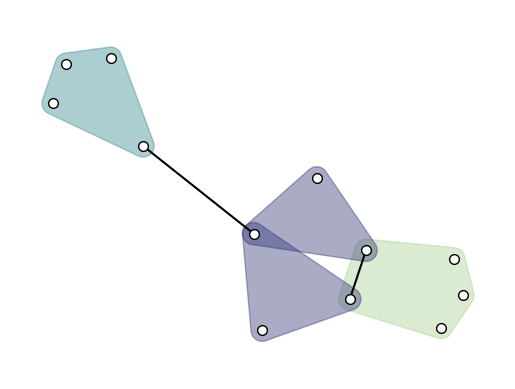

In [22]:
import matplotlib.pyplot as plt

import xgi

hyperedges = [[1, 2, 3], [3, 4, 5], [3, 6], [6, 7, 8, 9], [1, 4, 10, 11, 12], [1, 4]]
H = xgi.Hypergraph(hyperedges)


pos = xgi.barycenter_spring_layout(H, seed=1)
xgi.draw(H, pos=pos, hull=True)

plt.show()

#### Count of hyperedge

In [23]:
from collections import Counter

# Extract hyperedges and count frequencies
hyperedge_counter = Counter()

for hyperedge_id in range(hetero_graph.num_nodes('hyperedge')):
    connected_landmarks = hetero_graph.successors(hyperedge_id, etype='connects').tolist()
    landmark_names = [index_to_landmark_name[idx] for idx in connected_landmarks]
    
    if len(landmark_names) > 1:
        # Use frozenset to ensure combination uniqueness
        hyperedge = frozenset(landmark_names)
        hyperedge_counter[hyperedge] += 1  # Count frequency

# Sort by frequency
sorted_hyperedges = sorted(hyperedge_counter.items(), key=lambda x: (-x[1], sorted(x[0])))

# Output results
print(f"Total unique hyperedge combinations: {len(sorted_hyperedges)}\n")

for hyperedge, freq in sorted_hyperedges:
    landmarks = ", ".join(sorted(hyperedge))  # Sort landmarks alphabetically within combination
    print(f"{landmarks}: {freq} times")


Total unique hyperedge combinations: 37

big_ben, london_eye: 29 times
tate_modern, the_shard: 29 times
the_shard, walkie_talkie: 23 times
london_eye, the_shard: 14 times
london_tower, tower_bridge: 12 times
gherkin, the_shard: 10 times
st_paul, tate_modern: 9 times
st_paul, tate_modern, the_shard: 8 times
st_paul, the_shard: 7 times
the_shard, tower_bridge: 7 times
gherkin, tate_modern: 5 times
gherkin, the_shard, tower_bridge: 5 times
the_shard, tower_bridge, walkie_talkie: 5 times
london_tower, the_shard, tower_bridge: 4 times
gherkin, tate_modern, the_shard: 3 times
gherkin, tower_bridge: 3 times
gherkin, walkie_talkie: 3 times
london_tower, the_shard: 3 times
london_tower, tower_bridge, walkie_talkie: 3 times
london_tower, walkie_talkie: 3 times
gherkin, london_tower: 2 times
gherkin, london_tower, the_shard, tower_bridge, walkie_talkie: 2 times
london_eye, tate_modern, the_shard: 2 times
tower_bridge, walkie_talkie: 2 times
belfast, gherkin, london_tower, the_shard, tower_bridge:

#### Some visualization attempts

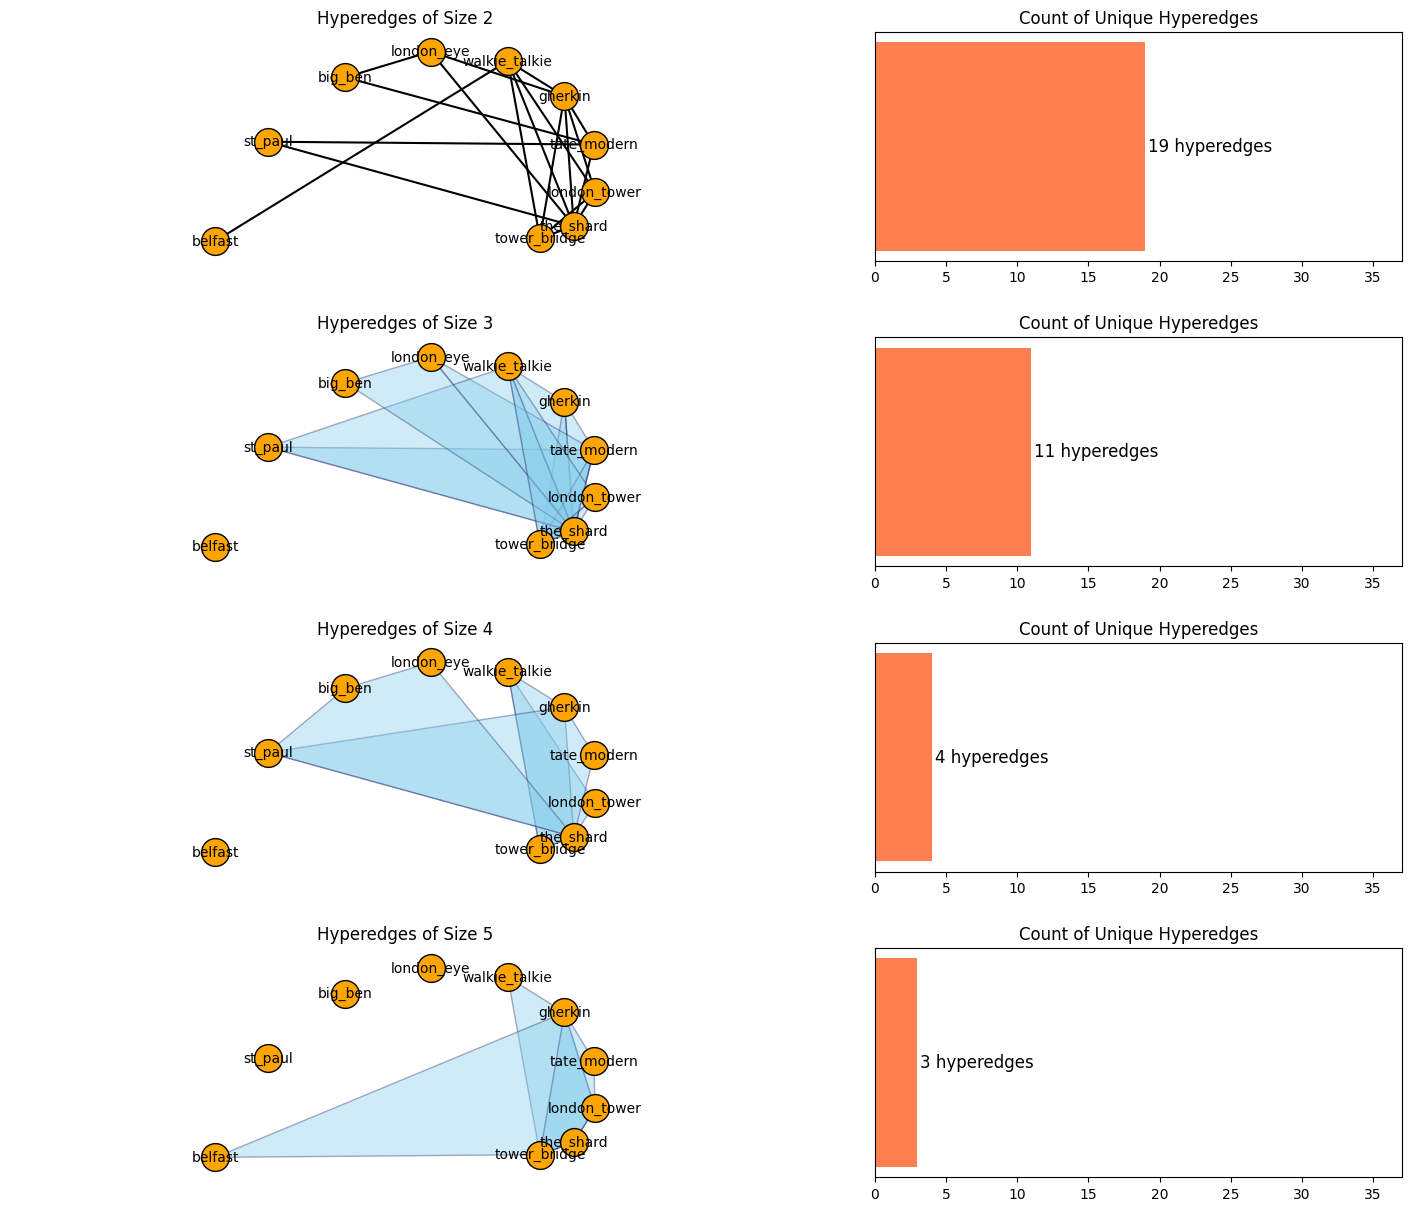

In [49]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
import xgi

# Input hyperedges with frequencies
hyperedges = {
    ('big_ben', 'london_eye'): 29,
    ('tate_modern', 'the_shard'): 29,
    ('the_shard', 'walkie_talkie'): 23,
    ('london_eye', 'the_shard'): 14,
    ('london_tower', 'tower_bridge'): 12,
    ('gherkin', 'the_shard'): 10,
    ('st_paul', 'tate_modern'): 9,
    ('st_paul', 'tate_modern', 'the_shard'): 8,
    ('st_paul', 'the_shard'): 7,
    ('the_shard', 'tower_bridge'): 7,
    ('gherkin', 'tate_modern'): 5,
    ('gherkin', 'the_shard', 'tower_bridge'): 5,
    ('the_shard', 'tower_bridge', 'walkie_talkie'): 5,
    ('london_tower', 'the_shard', 'tower_bridge'): 4,
    ('gherkin', 'tate_modern', 'the_shard'): 3,
    ('gherkin', 'tower_bridge'): 3,
    ('gherkin', 'walkie_talkie'): 3,
    ('london_tower', 'the_shard'): 3,
    ('london_tower', 'tower_bridge', 'walkie_talkie'): 3,
    ('london_tower', 'walkie_talkie'): 3,
    ('gherkin', 'london_tower'): 2,
    ('gherkin', 'london_tower', 'the_shard', 'tower_bridge', 'walkie_talkie'): 2,
    ('london_eye', 'tate_modern', 'the_shard'): 2,
    ('tower_bridge', 'walkie_talkie'): 2,
    ('belfast', 'gherkin', 'london_tower', 'the_shard', 'tower_bridge'): 1,
    ('belfast', 'walkie_talkie'): 1,
    ('big_ben', 'london_eye', 'st_paul', 'the_shard'): 1,
    ('big_ben', 'london_eye', 'the_shard'): 1,
    ('big_ben', 'tate_modern'): 1,
    ('gherkin', 'london_eye'): 1,
    ('gherkin', 'london_tower', 'tate_modern', 'the_shard', 'tower_bridge'): 1,
    ('gherkin', 'st_paul', 'tate_modern', 'the_shard'): 1,
    ('gherkin', 'the_shard', 'tower_bridge', 'walkie_talkie'): 1,
    ('gherkin', 'the_shard', 'walkie_talkie'): 1,
    ('london_tower', 'the_shard', 'tower_bridge', 'walkie_talkie'): 1,
    ('st_paul', 'the_shard', 'walkie_talkie'): 1,
    ('tate_modern', 'the_shard', 'tower_bridge'): 1,
}

# Convert hyperedges dictionary to a list of unique hyperedges
unique_hyperedges = set(frozenset(hedge) for hedge in hyperedges.keys())
hyperedge_list = [list(hedge) for hedge in unique_hyperedges]

# Create a hypergraph
H = xgi.Hypergraph(hyperedge_list)

# Compute positions for consistent layout
pos = xgi.pca_transform(xgi.pairwise_spring_layout(H, seed=3))
pos =  xgi.spiral_layout(H)
# Determine unique sizes
hyperedge_sizes = sorted(set(len(edge) for edge in hyperedge_list))

# Create sub-hypergraphs by hyperedge size
subgraphs_by_size = {
    size: xgi.subhypergraph(H, edges=H.edges.filterby("size", size, "eq")).copy()
    for size in hyperedge_sizes
}

# Plotting setup
fig = plt.figure(layout="constrained", figsize=(14, 3 * len(hyperedge_sizes)))
gs = gridspec.GridSpec(len(hyperedge_sizes), 2, width_ratios=[3, 2],  figure=fig, wspace=0.1, hspace=0.1)

# Plot each row for different hyperedge sizes
for i, size in enumerate(hyperedge_sizes):
    # Sub-hypergraph for current size
    H_sub = subgraphs_by_size[size]
    
    # Visualization of unique hyperedges
    ax_graph = fig.add_subplot(gs[i, 0])
    xgi.draw(H_sub, pos=pos, ax=ax_graph, edge_fc="skyblue",
             #hyperedge_labels=True,
             node_size=20, node_fc="orange", 
             node_labels=True)

   
    ax_graph.set_title(f"Hyperedges of Size {size}")
    
    # Display the count of unique hyperedges as a bar plot
    ax_count = fig.add_subplot(gs[i, 1])
    ax_count.barh([0], [H_sub.num_edges], color='coral')
    ax_count.set_xlim(0, max(len(hyperedge_list), 5))
    ax_count.set_yticks([])
    ax_count.text(H_sub.num_edges + 0.2, 0, f"{H_sub.num_edges} hyperedges", va='center', fontsize=12)
    ax_count.set_title("Count of Unique Hyperedges")

plt.show()



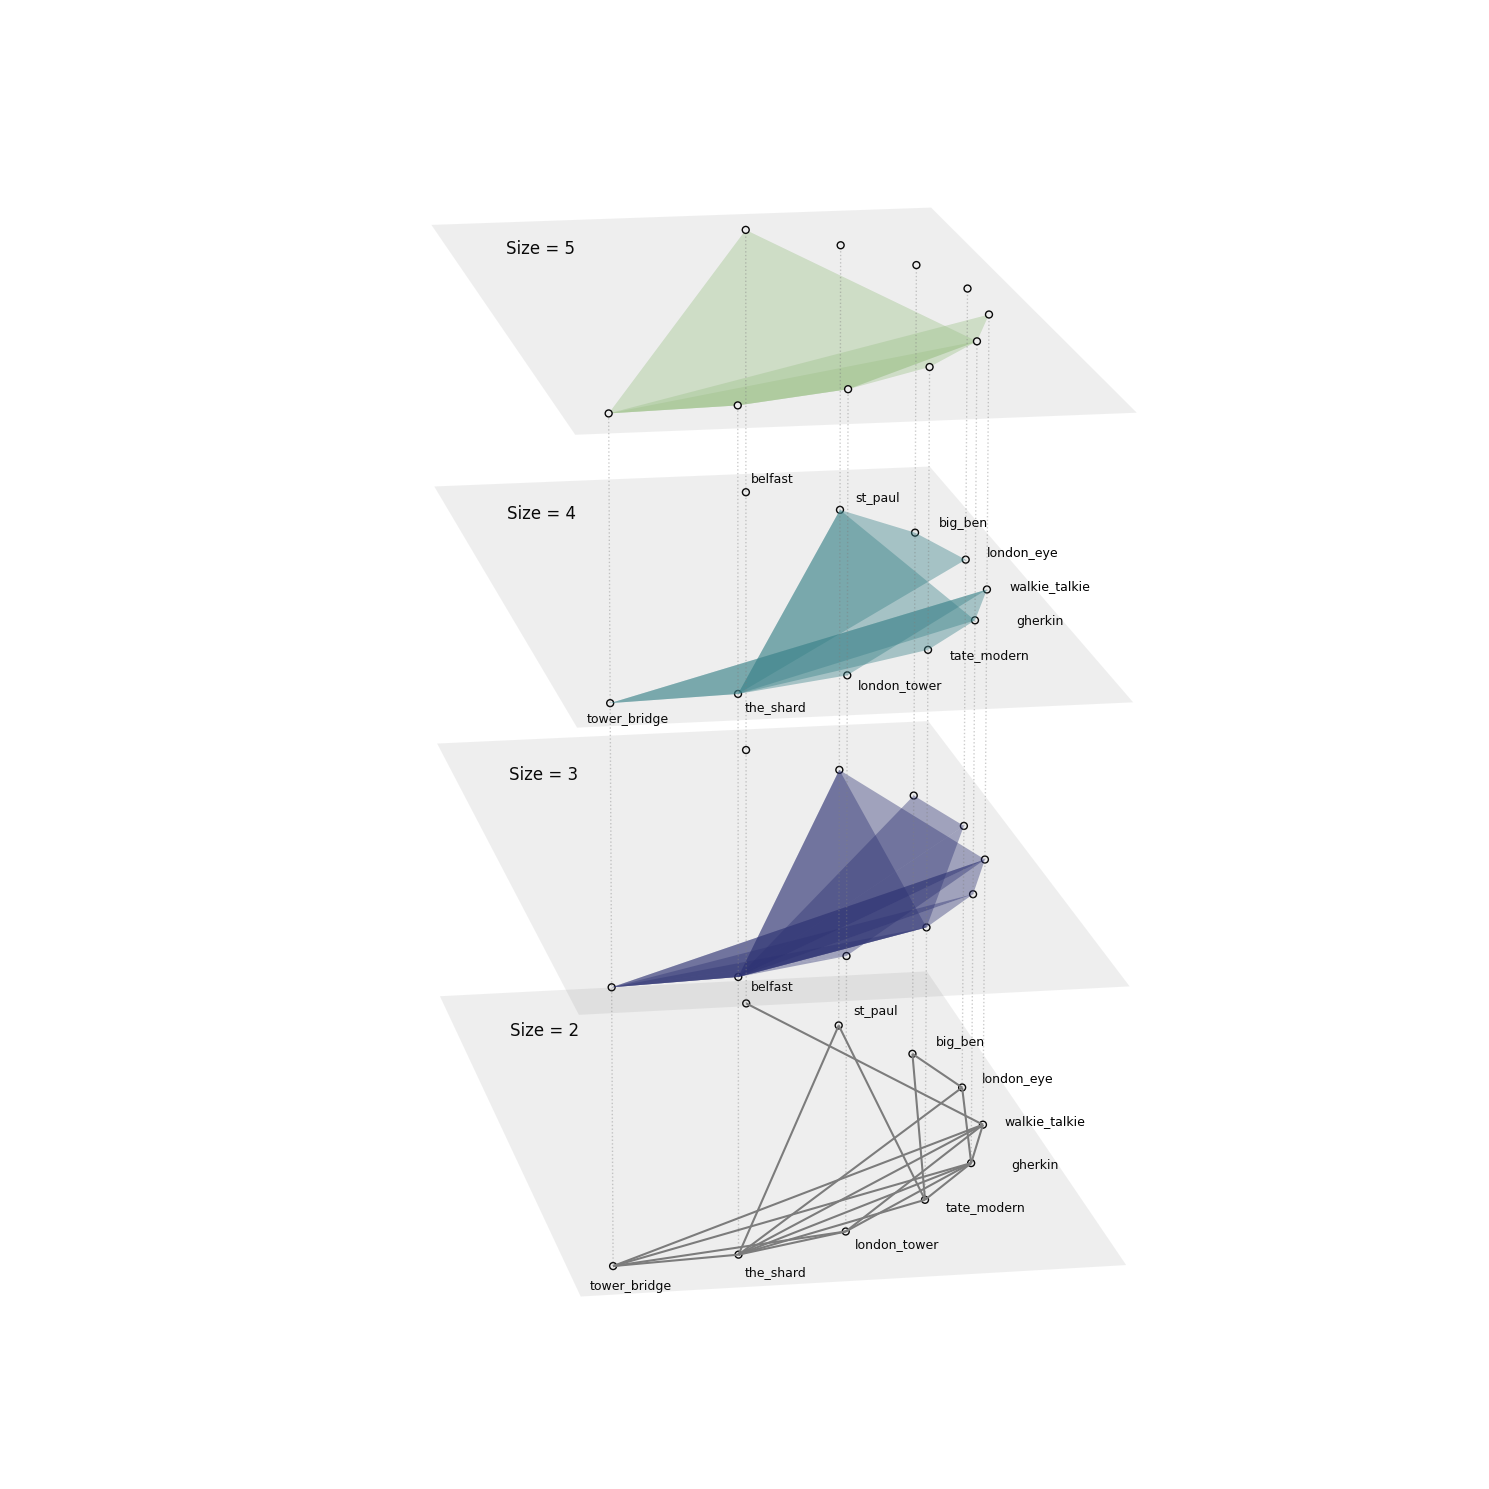

In [52]:
import matplotlib.pyplot as plt
import xgi
import numpy as np

# Hyperedges with frequencies
hyperedges = {
    ('big_ben', 'london_eye'): 29,
    ('tate_modern', 'the_shard'): 29,
    ('the_shard', 'walkie_talkie'): 23,
    ('london_eye', 'the_shard'): 14,
    ('london_tower', 'tower_bridge'): 12,
    ('gherkin', 'the_shard'): 10,
    ('st_paul', 'tate_modern'): 9,
    ('st_paul', 'tate_modern', 'the_shard'): 8,
    ('st_paul', 'the_shard'): 7,
    ('the_shard', 'tower_bridge'): 7,
    ('gherkin', 'tate_modern'): 5,
    ('gherkin', 'the_shard', 'tower_bridge'): 5,
    ('the_shard', 'tower_bridge', 'walkie_talkie'): 5,
    ('london_tower', 'the_shard', 'tower_bridge'): 4,
    ('gherkin', 'tate_modern', 'the_shard'): 3,
    ('gherkin', 'tower_bridge'): 3,
    ('gherkin', 'walkie_talkie'): 3,
    ('london_tower', 'the_shard'): 3,
    ('london_tower', 'tower_bridge', 'walkie_talkie'): 3,
    ('london_tower', 'walkie_talkie'): 3,
    ('gherkin', 'london_tower'): 2,
    ('gherkin', 'london_tower', 'the_shard', 'tower_bridge', 'walkie_talkie'): 2,
    ('london_eye', 'tate_modern', 'the_shard'): 2,
    ('tower_bridge', 'walkie_talkie'): 2,
    ('belfast', 'gherkin', 'london_tower', 'the_shard', 'tower_bridge'): 1,
    ('belfast', 'walkie_talkie'): 1,
    ('big_ben', 'london_eye', 'st_paul', 'the_shard'): 1,
    ('big_ben', 'london_eye', 'the_shard'): 1,
    ('big_ben', 'tate_modern'): 1,
    ('gherkin', 'london_eye'): 1,
    ('gherkin', 'london_tower', 'tate_modern', 'the_shard', 'tower_bridge'): 1,
    ('gherkin', 'st_paul', 'tate_modern', 'the_shard'): 1,
    ('gherkin', 'the_shard', 'tower_bridge', 'walkie_talkie'): 1,
    ('gherkin', 'the_shard', 'walkie_talkie'): 1,
    ('london_tower', 'the_shard', 'tower_bridge', 'walkie_talkie'): 1,
    ('st_paul', 'the_shard', 'walkie_talkie'): 1,
    ('tate_modern', 'the_shard', 'tower_bridge'): 1,
}

# Convert hyperedges dictionary to a list of unique hyperedges
unique_hyperedges = set(frozenset(hedge) for hedge in hyperedges.keys())
hyperedge_list = [list(hedge) for hedge in unique_hyperedges]

# Create a hypergraph
H = xgi.Hypergraph(hyperedge_list)

# Generate node positions using spiral layout
pos = xgi.spiral_layout(H, equidistant=True)

# Plotting
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={"projection": "3d"})

# Draw multilayer hypergraph
sep = 2.2  # Vertical separation between layers
xgi.draw_multilayer(
    H,
    pos=pos,
    ax=ax,
    h_angle=15,
    v_angle=-10,
    sep=sep
)

# Place all labels on the top layer and outside the spiral
label_offset = 0.5  # Distance from the node position to place the label

# Determine the maximum Z-coordinate (top layer)
max_layer = max(len(H.edges.members(edge)) for edge in H.edges)



z_max = (max_layer - 1.45-1) * sep +1
# Place labels radially outward from the spiral
for node, (x, y) in pos.items():
    # Calculate the angle from the center for radial placement
    angle = np.arctan2(y, x)
    # Extend the label position outward along the angle direction
    x_label = x + label_offset * np.cos(angle)
    y_label = y + label_offset * np.sin(angle)

    # Place label at the top layer (fixed z_max)
    ax.text(x_label, y_label, z_max, node, fontsize=9, ha='center', va='center', color='black')


z_max = (max_layer - 1.45 - 3) * sep +1
# Place labels radially outward from the spiral
for node, (x, y) in pos.items():
    # Calculate the angle from the center for radial placement
    angle = np.arctan2(y, x)
    # Extend the label position outward along the angle direction
    x_label = x + label_offset * np.cos(angle)
    y_label = y + label_offset * np.sin(angle)

    # Place label at the top layer (fixed z_max)
    ax.text(x_label, y_label, z_max, node, fontsize=9, ha='center', va='center', color='black')



layer_sizes = [5, 4, 3, 2]
for size in layer_sizes:
    z_annotation = (size - 1) * sep  # Corresponding Z-layer
    ax.text(-3, 1, z_annotation, f'Size = {size}', fontsize=12, ha='right', va='center', color='black')
# Remove gridlines and ticks for a cleaner look
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

# Apply tight layout to minimize whitespace
plt.tight_layout()
plt.show()


#### Formal Results

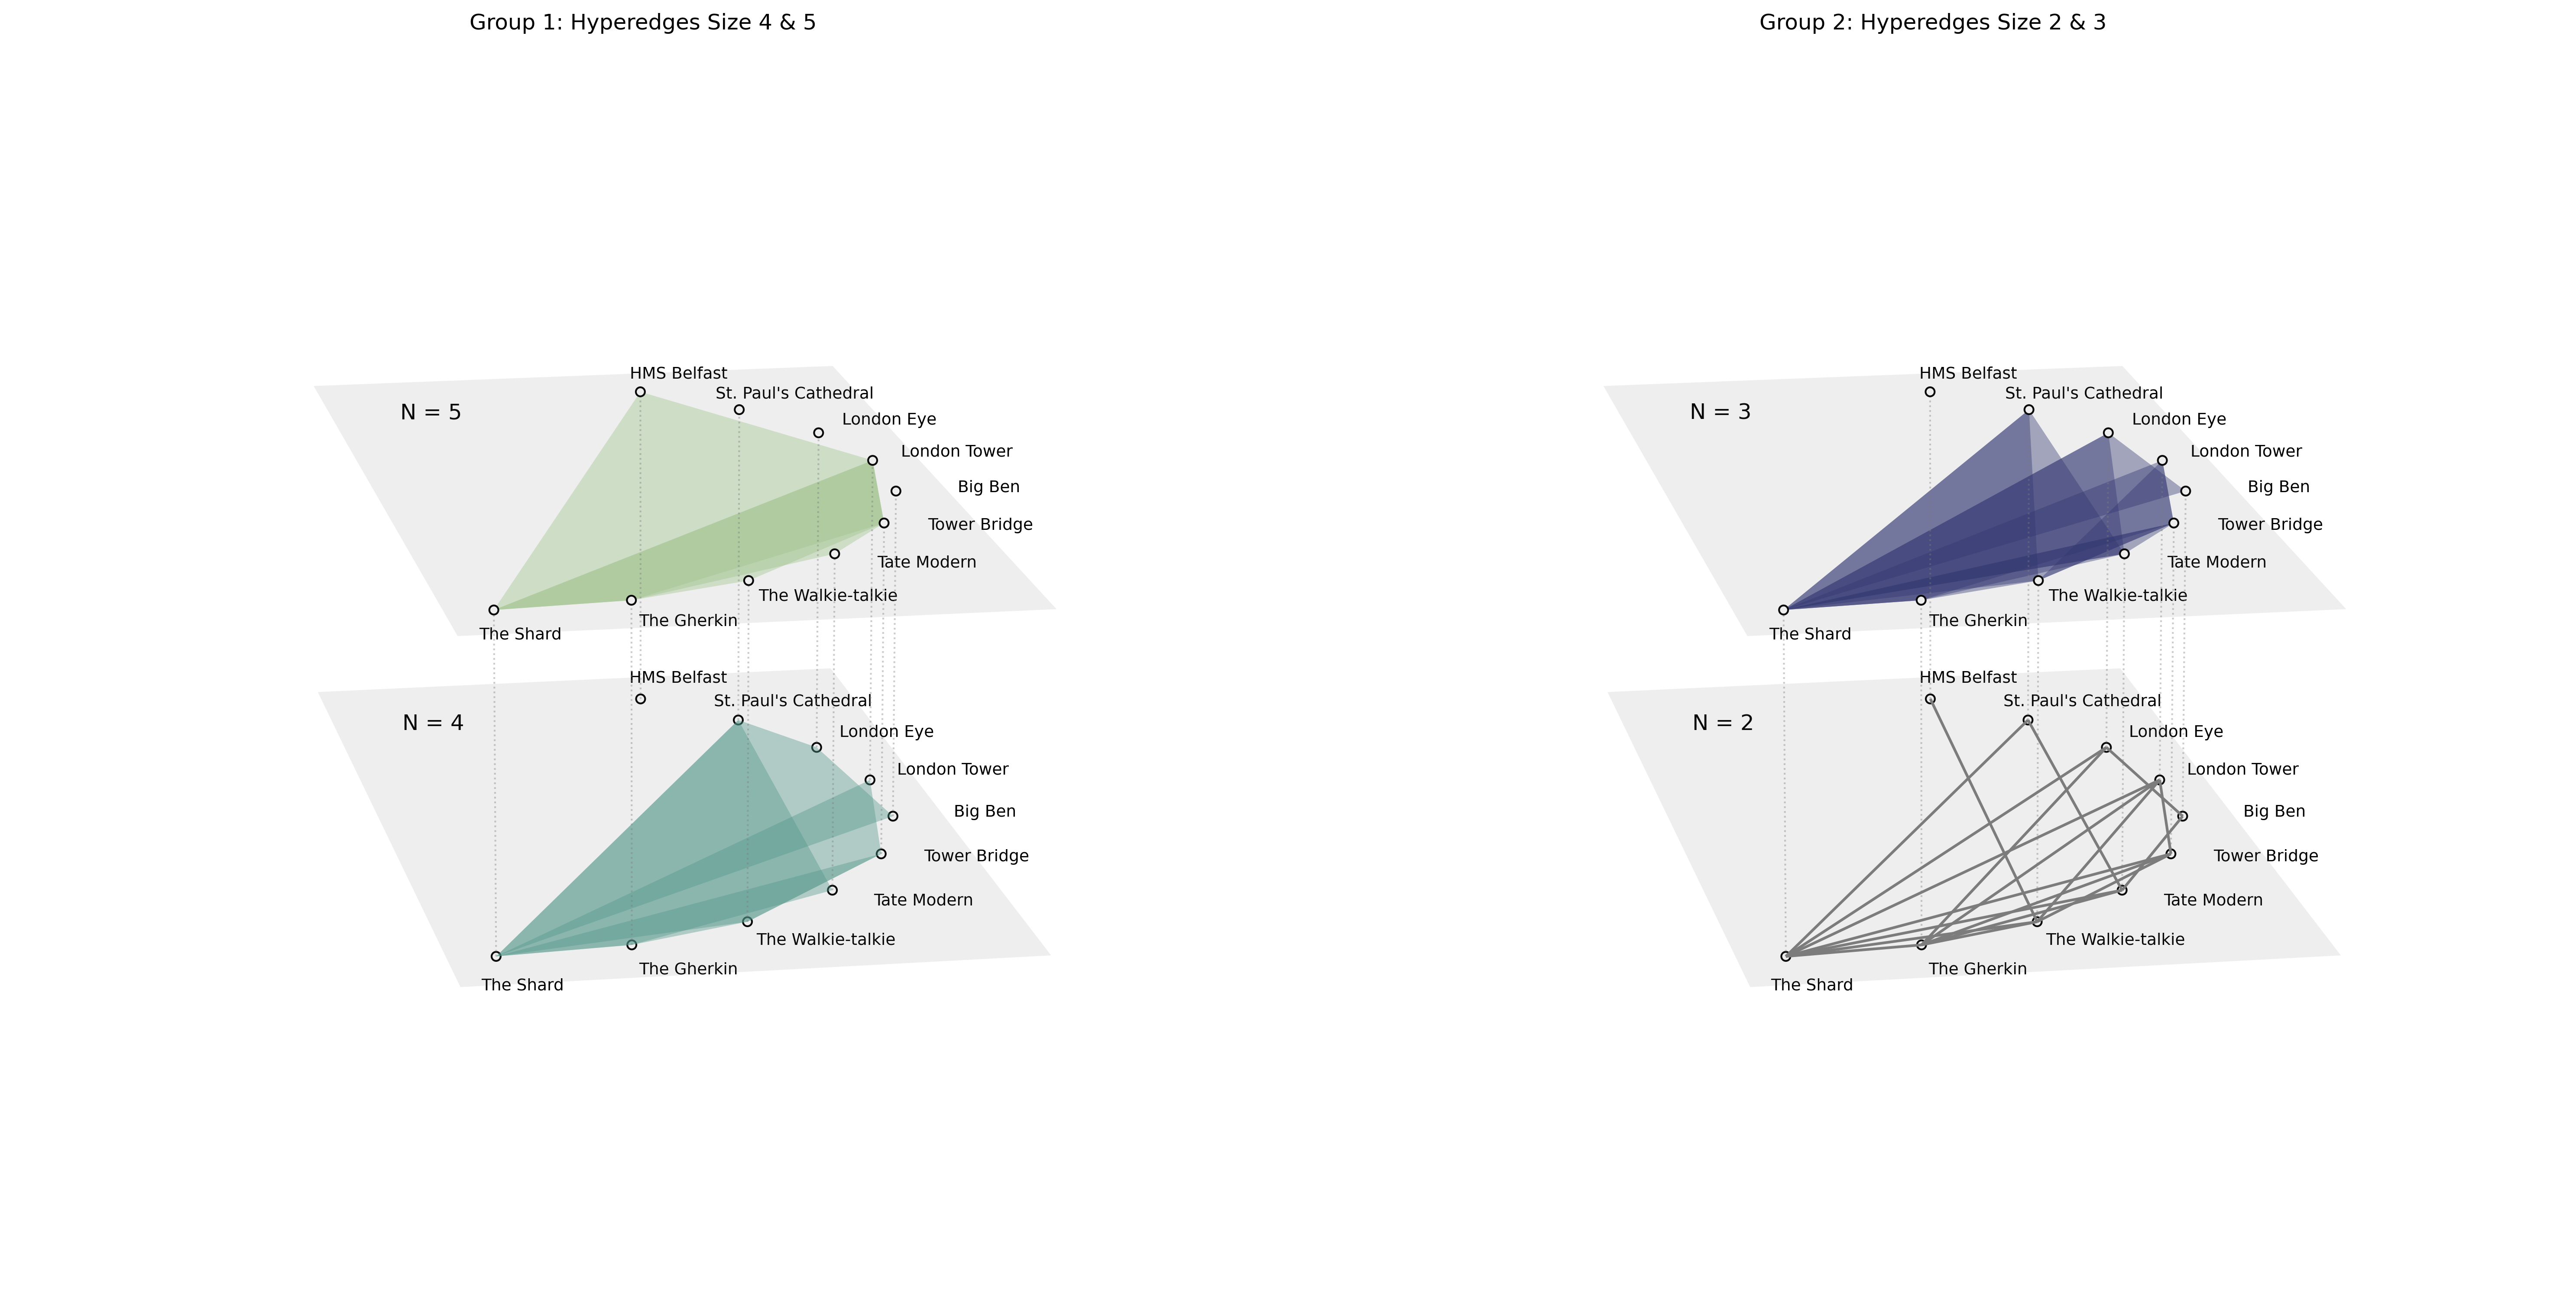

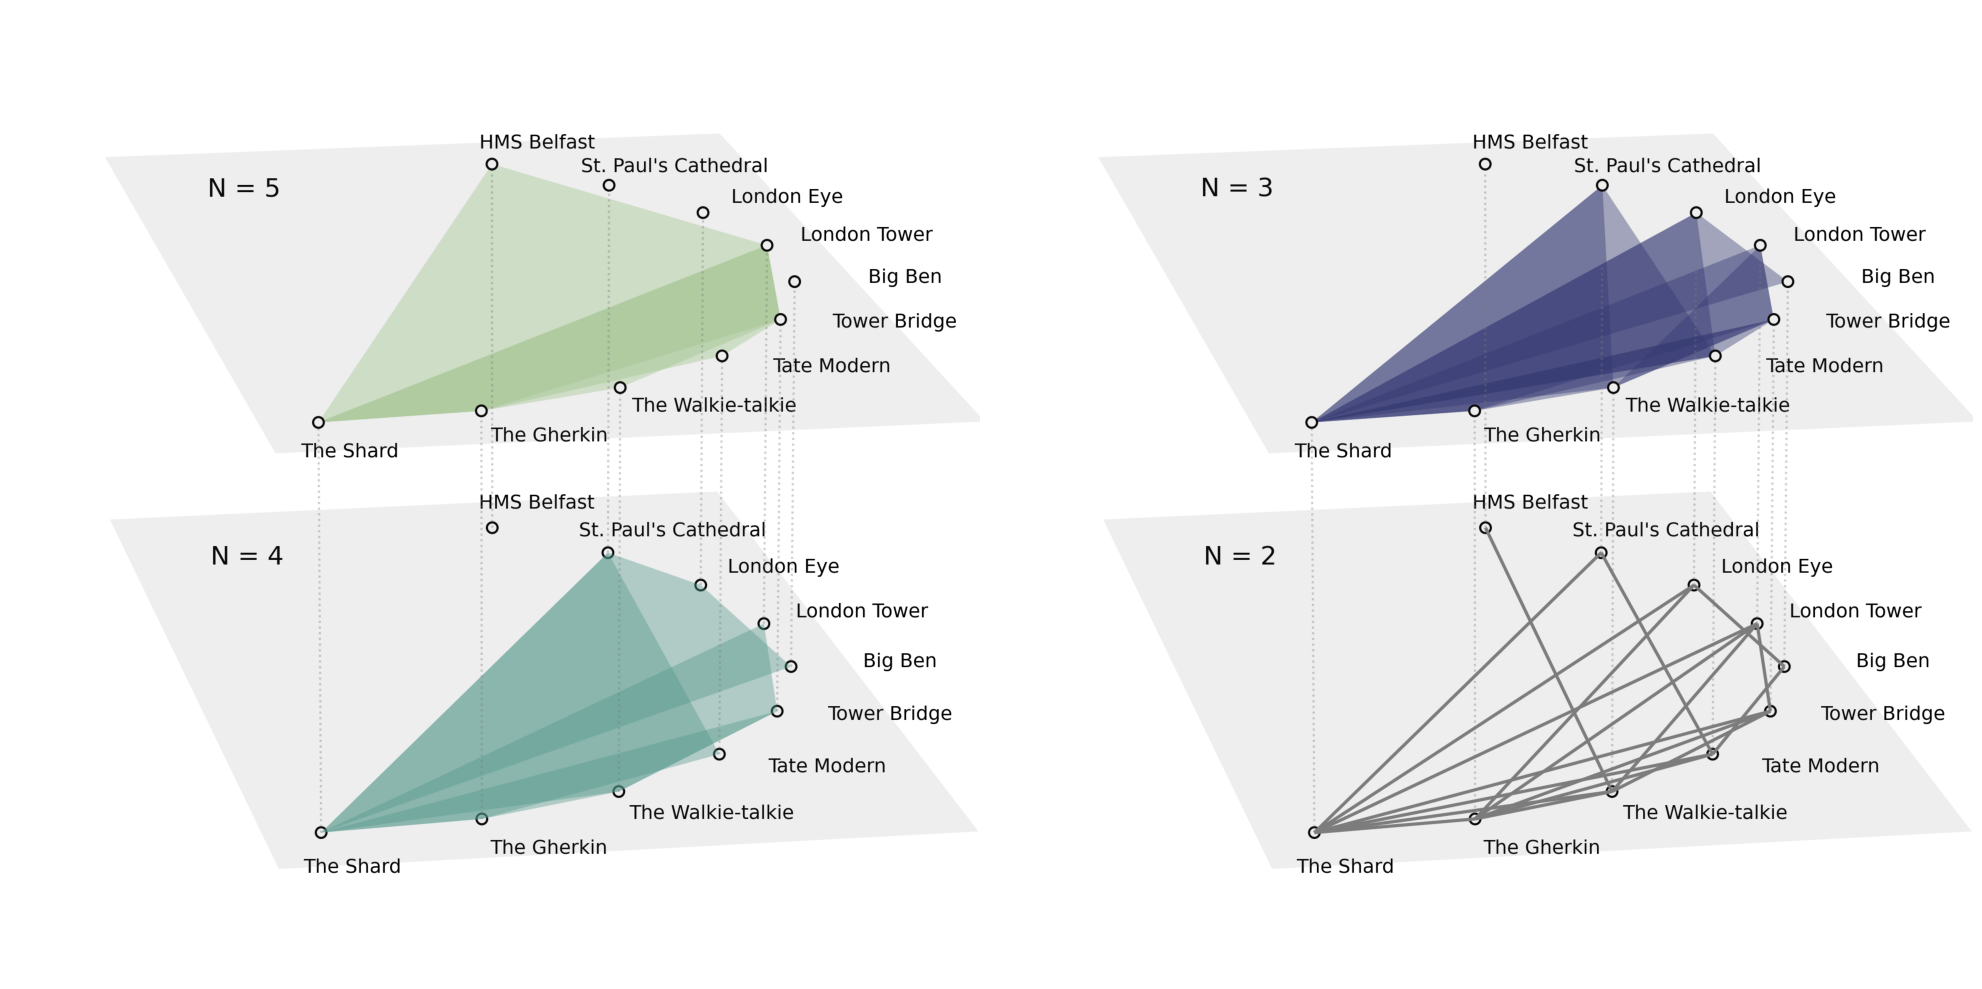

In [25]:
import matplotlib.pyplot as plt
import xgi
import numpy as np

# ------------------ Original code section, no changes ------------------


query_images = {
    'big_ben': {
        'image': Image.open('data/global_quairys/london_quiery/big_ben.jpg').convert("RGB"),
        'name':'Big Ben',
        #'height': 500,  # Example height in pixels
        'height': 136 +50,  # Example height in pixels
        'location': (51.50067742771776, -0.1245917078514397),  # Example (x, y) location in pixels within the image
        'era': 'historical'  # Completed in 1859, historical landmark
    },
    'gherkin': {
        'image': Image.open('data/global_quairys/london_quiery/gherkin.jpg').convert("RGB"),
        'name':'The Gherkin',
        'height': 180+150,
        'location': (51.514425676412266, -0.08034253877566065),
        'era': 'modern'  # Completed in 2004, modern landmark
    },
    # Add more query images as needed
    'london_eye': {
        'image': Image.open('data/global_quairys/london_quiery/london_eye.jpg').convert("RGB"),
        'name':'London Eye',
        'height': 135+50,
        'location': (51.50325678772387, -0.11968602374317167),
        'era': 'modern'  # Completed in 2000, modern landmark
    },
    'st_paul': {
        'image': Image.open('data/global_quairys/london_quiery/st_paul.jpg').convert("RGB"),
        'name':'St. Paul\'s Cathedral',
        'height': 111+100,
        'location': (51.51372488153867, -0.09835669261103407),
        'era': 'historical'  # Completed in 1710, historical landmark
    },
    'tower_bridge': {
        'image': Image.open('data/global_quairys/london_quiery/tower_bridge.jpg').convert("RGB"),
        'name':'Tower Bridge',
        'height': 65+20,
        'location': (51.505286271502925, -0.07557582210691857),
        'era': 'historical'  # Completed in 1894, historical landmark
    },
    'the_shard': {
        'image': Image.open('data/global_quairys/london_quiery/the_shard.jpg').convert("RGB"),
        'name':'The Shard',
        'height': 310+190,
        'location': (51.50462497710506, -0.08652726915106525),
        'era': 'modern'  # Completed in 2012, modern landmark
    },
    'london_tower': {
        'image': Image.open('data/global_quairys/london_quiery/london_tower.jpg').convert("RGB"),
        'name':'London Tower',
        'height': 27+13,
        'location': (51.50814912539999, -0.07593857137065564),
        'era': 'historical'  # Built in 11th century, historical landmark
    },
    'tate_modern': {
        'image': Image.open('data/global_quairys/london_quiery/tate.jpg').convert("RGB"),
        'name':'Tate Modern',
        'height': 99+50,
        'location': (51.50790142258951, -0.0993475020370249),
        'era': 'modern'  # Opened as an art gallery in 2000, modern landmark
    },
    'belfast': {
        'image': Image.open('data/global_quairys/london_quiery/belfast.jpg').convert("RGB"),
        'name':'HMS Belfast',
        'height': 30,
        'location': (51.50661247983305, -0.08137847973109241),
        'era': 'historical'  # Historical warship, historical landmark
    },
    'walkie_talkie': {
        'image': Image.open('data/global_quairys/london_quiery/walkie.jpg').convert("RGB"),
        'name':'The Walkie-talkie',
        'height': 160+100,
        'location': (51.50661247983305, -0.08137847973109241),
        'era': 'modern'  # Completed in 2014, modern landmark
    }
}
# Hyperedges with frequencies
hyperedges = {
    ('big_ben', 'london_eye'): 29,
    ('tate_modern', 'the_shard'): 29,
    ('the_shard', 'walkie_talkie'): 23,
    ('london_eye', 'the_shard'): 14,
    ('london_tower', 'tower_bridge'): 12,
    ('gherkin', 'the_shard'): 10,
    ('st_paul', 'tate_modern'): 9,
    ('st_paul', 'tate_modern', 'the_shard'): 8,
    ('st_paul', 'the_shard'): 7,
    ('the_shard', 'tower_bridge'): 7,
    ('gherkin', 'tate_modern'): 5,
    ('gherkin', 'the_shard', 'tower_bridge'): 5,
    ('the_shard', 'tower_bridge', 'walkie_talkie'): 5,
    ('london_tower', 'the_shard', 'tower_bridge'): 4,
    ('gherkin', 'tate_modern', 'the_shard'): 3,
    ('gherkin', 'tower_bridge'): 3,
    ('gherkin', 'walkie_talkie'): 3,
    ('london_tower', 'the_shard'): 3,
    ('london_tower', 'tower_bridge', 'walkie_talkie'): 3,
    ('london_tower', 'walkie_talkie'): 3,
    ('gherkin', 'london_tower'): 2,
    ('gherkin', 'london_tower', 'the_shard', 'tower_bridge', 'walkie_talkie'): 2,
    ('london_eye', 'tate_modern', 'the_shard'): 2,
    ('tower_bridge', 'walkie_talkie'): 2,
    ('belfast', 'gherkin', 'london_tower', 'the_shard', 'tower_bridge'): 1,
    ('belfast', 'walkie_talkie'): 1,
    ('big_ben', 'london_eye', 'st_paul', 'the_shard'): 1,
    ('big_ben', 'london_eye', 'the_shard'): 1,
    ('big_ben', 'tate_modern'): 1,
    ('gherkin', 'london_eye'): 1,
    ('gherkin', 'london_tower', 'tate_modern', 'the_shard', 'tower_bridge'): 1,
    ('gherkin', 'st_paul', 'tate_modern', 'the_shard'): 1,
    ('gherkin', 'the_shard', 'tower_bridge', 'walkie_talkie'): 1,
    ('gherkin', 'the_shard', 'walkie_talkie'): 1,
    ('london_tower', 'the_shard', 'tower_bridge', 'walkie_talkie'): 1,
    ('st_paul', 'the_shard', 'walkie_talkie'): 1,
    ('tate_modern', 'the_shard', 'tower_bridge'): 1,
}

# Convert hyperedges dictionary to a list of unique hyperedges
unique_hyperedges = set(frozenset(hedge) for hedge in hyperedges.keys())
hyperedge_list = [list(hedge) for hedge in unique_hyperedges]

# Create a hypergraph
H = xgi.Hypergraph(hyperedge_list)

# Generate node positions using spiral layout
pos = xgi.spiral_layout(H, equidistant=True)

# Create two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 10), subplot_kw={"projection": "3d"},dpi=300)

# Assign consistent colors based on hyperedge sizes
edge_sizes = [len(H.edges.members(edge)) for edge in H.edges]
unique_sizes = sorted(set(edge_sizes))

# Colormap setup (replace deprecated get_cmap)
cmap = plt.colormaps['crest_r']
size_color_map = {size: cmap(i / (len(unique_sizes) - 1)) for i, size in enumerate(unique_sizes)}

# Group 1: Hyperedges with size 4 and 5
group1_edges = [edge for edge in H.edges if len(H.edges.members(edge)) in [4, 5]]
H_group1 = xgi.subhypergraph(H, edges=group1_edges)

# Function to draw each group with consistent colors
def draw_group(H_sub, ax, title):
    sep = 2.5
    # Ensure each edge in the subgraph gets its color
    edge_fc = [size_color_map.get(len(H_sub.edges.members(edge)), 'grey') for edge in H_sub.edges]
    assert len(edge_fc) == H_sub.num_edges, "Mismatch between edges and assigned colors!"
    xgi.draw_multilayer(
        H_sub,
        pos=pos,
        ax=ax,
        h_angle=15,
        v_angle=-10,
        sep=sep,
        edge_fc=edge_fc,  
        node_fc='white',
        node_ec='black',
    )
    label_offset = 0.7
    max_layer = max(len(H_sub.edges.members(edge)) for edge in H_sub.edges)
    z_max = (max_layer - 1.4) * sep + 1

    # Place labels
    for node, (x, y) in pos.items():
        if node in H_sub.nodes:
            angle = np.arctan2(y, x)
            x_label = x + label_offset * np.cos(angle)
            y_label = y + label_offset * np.sin(angle)
            # Use 'name' from query_images as node label
            node_name = query_images[node]['name']
            ax.text(x_label, y_label, z_max, node_name, fontsize=9, ha='center', va='center', color='black')


    z_max = (max_layer - 1.4-1) * sep + 1

    # Place labels
    for node, (x, y) in pos.items():
        if node in H_sub.nodes:
            angle = np.arctan2(y, x)
            x_label = x + label_offset * np.cos(angle)
            y_label = y + label_offset * np.sin(angle)
            # Use 'name' from query_images as node label
            node_name = query_images[node]['name']
            ax.text(x_label, y_label, z_max, node_name, fontsize=9, ha='center', va='center', color='black')

    # Add layer annotations
    layer_sizes = sorted(set(len(H_sub.edges.members(edge)) for edge in H_sub.edges))
    for size in layer_sizes:
        z_annotation = (size - 1) * sep
        ax.text(-3, 1, z_annotation, f'N = {size}', fontsize=12, ha='right', va='center', color='black')

    ax.set_title(title)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

draw_group(H_group1, axs[0], "Group 1: Hyperedges Size 4 & 5")

# Group 2: Hyperedges with size 2 and 3
group2_edges = [edge for edge in H.edges if len(H.edges.members(edge)) in [2, 3]]
H_group2 = xgi.subhypergraph(H, edges=group2_edges)

# Function to draw each group
def draw_group(H_sub, ax, title):
    sep = 2.5
    xgi.draw_multilayer(
        H_sub,
        pos=pos,
        ax=ax,
        h_angle=15,
        v_angle=-10,
        sep=sep
    )
    label_offset = 0.7
    max_layer = max(len(H_sub.edges.members(edge)) for edge in H_sub.edges)
    z_max = (max_layer - 1.4) * sep + 1

    # Place labels
    for node, (x, y) in pos.items():
        if node in H_sub.nodes:
            angle = np.arctan2(y, x)
            x_label = x + label_offset * np.cos(angle)
            y_label = y + label_offset * np.sin(angle)
            # Use 'name' from query_images as node label
            node_name = query_images[node]['name']
            ax.text(x_label, y_label, z_max, node_name, fontsize=9, ha='center', va='center', color='black')

    # Add layer annotations
    layer_sizes = sorted(set(len(H_sub.edges.members(edge)) for edge in H_sub.edges))
    for size in layer_sizes:
        z_annotation = (size - 1) * sep
        ax.text(-3, 1, z_annotation, f'N = {size}', fontsize=12, ha='right', va='center', color='black')

    z_max = (max_layer - 1.4 - 1) * sep +1
    # Place labels radially outward from the spiral
    for node, (x, y) in pos.items():
        angle = np.arctan2(y, x)
        x_label = x + label_offset * np.cos(angle)
        y_label = y + label_offset * np.sin(angle)
        # Use 'name' from query_images as node label
        node_name = query_images[node]['name']
        ax.text(x_label, y_label, z_max, node_name, fontsize=9, ha='center', va='center', color='black')

    ax.set_title(title)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

draw_group(H_group2, axs[1], "Group 2: Hyperedges Size 2 & 3")

plt.tight_layout()
plt.show()  # Original image display complete

# ------------------ New "Crop and Combine" section ------------------

# To crop the center portion of each subplot in the current figure, we will:
# 1. Use canvas.draw() to render the entire figure as image data
# 2. Calculate pixel coordinates of each axes in the image based on their position (bbox),
#    then crop the center region according to the given ratio (crop_ratio)
# 3. Finally combine the cropped images into a new figure

# Ensure figure is fully rendered
fig.canvas.draw()

# Get figure pixel dimensions
fig_width_px = int(fig.get_figwidth() * fig.dpi)
fig_height_px = int(fig.get_figheight() * fig.dpi)

# Save the entire figure as an RGB image (numpy array)
fig_img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
fig_img = fig_img.reshape(fig_height_px, fig_width_px, 3)

# Define crop ratio (e.g., 0.8 means keep 80% of center region)
crop_ratio = 0.65
cropped_imgs = []

# Iterate through each subplot (axes)
for ax in axs:
    # Get normalized coordinates bbox of axes in figure (bottom-left corner coordinates, width and height)
    bbox = ax.get_position()
    left = int(bbox.x0 * fig_width_px)
    right = int(bbox.x1 * fig_width_px)
    bottom = int(bbox.y0 * fig_height_px)
    top = int(bbox.y1 * fig_height_px)
    # Note: In image, y-axis is top-down, so conversion is needed
    img_top = fig_height_px - top  # Upper boundary in image (smaller row number)
    img_bottom = fig_height_px - bottom  # Lower boundary in image (larger row number)

    axis_width = right - left
    axis_height = img_bottom - img_top

    # Calculate new width and height based on crop ratio
    crop_width = int(axis_width * crop_ratio)
    crop_height = int(axis_height * crop_ratio)

    # Calculate offset of crop region in original axes region (center crop)
    crop_left = left + (axis_width - crop_width) // 2
    crop_top = img_top + (axis_height - crop_height) // 2

    # Crop center portion of image
    cropped_img = fig_img[crop_top:crop_top + crop_height, crop_left:crop_left + crop_width, :]
    cropped_imgs.append(cropped_img)

# Combine the two cropped subplot images into a new figure (e.g., side by side)
# Create a high-resolution figure (e.g., dpi=300)
fig2, axs2 = plt.subplots(1, 2, figsize=(20, 10))

for i, cropped_img in enumerate(cropped_imgs):
    axs2[i].imshow(cropped_img)
    axs2[i].axis('off')
#axs2[0].set_title("Group 1 (Cropped)")
#axs2[1].set_title("Group 2 (Cropped)")
#fig2.suptitle("Central Parts of Subplots (Crop Ratio = {})".format(crop_ratio), fontsize=14)
plt.tight_layout()
plt.show()


In [26]:
final_dpi = 300
fig2.savefig("report\images\hyper_edge_visualization.png", dpi=final_dpi, bbox_inches='tight')

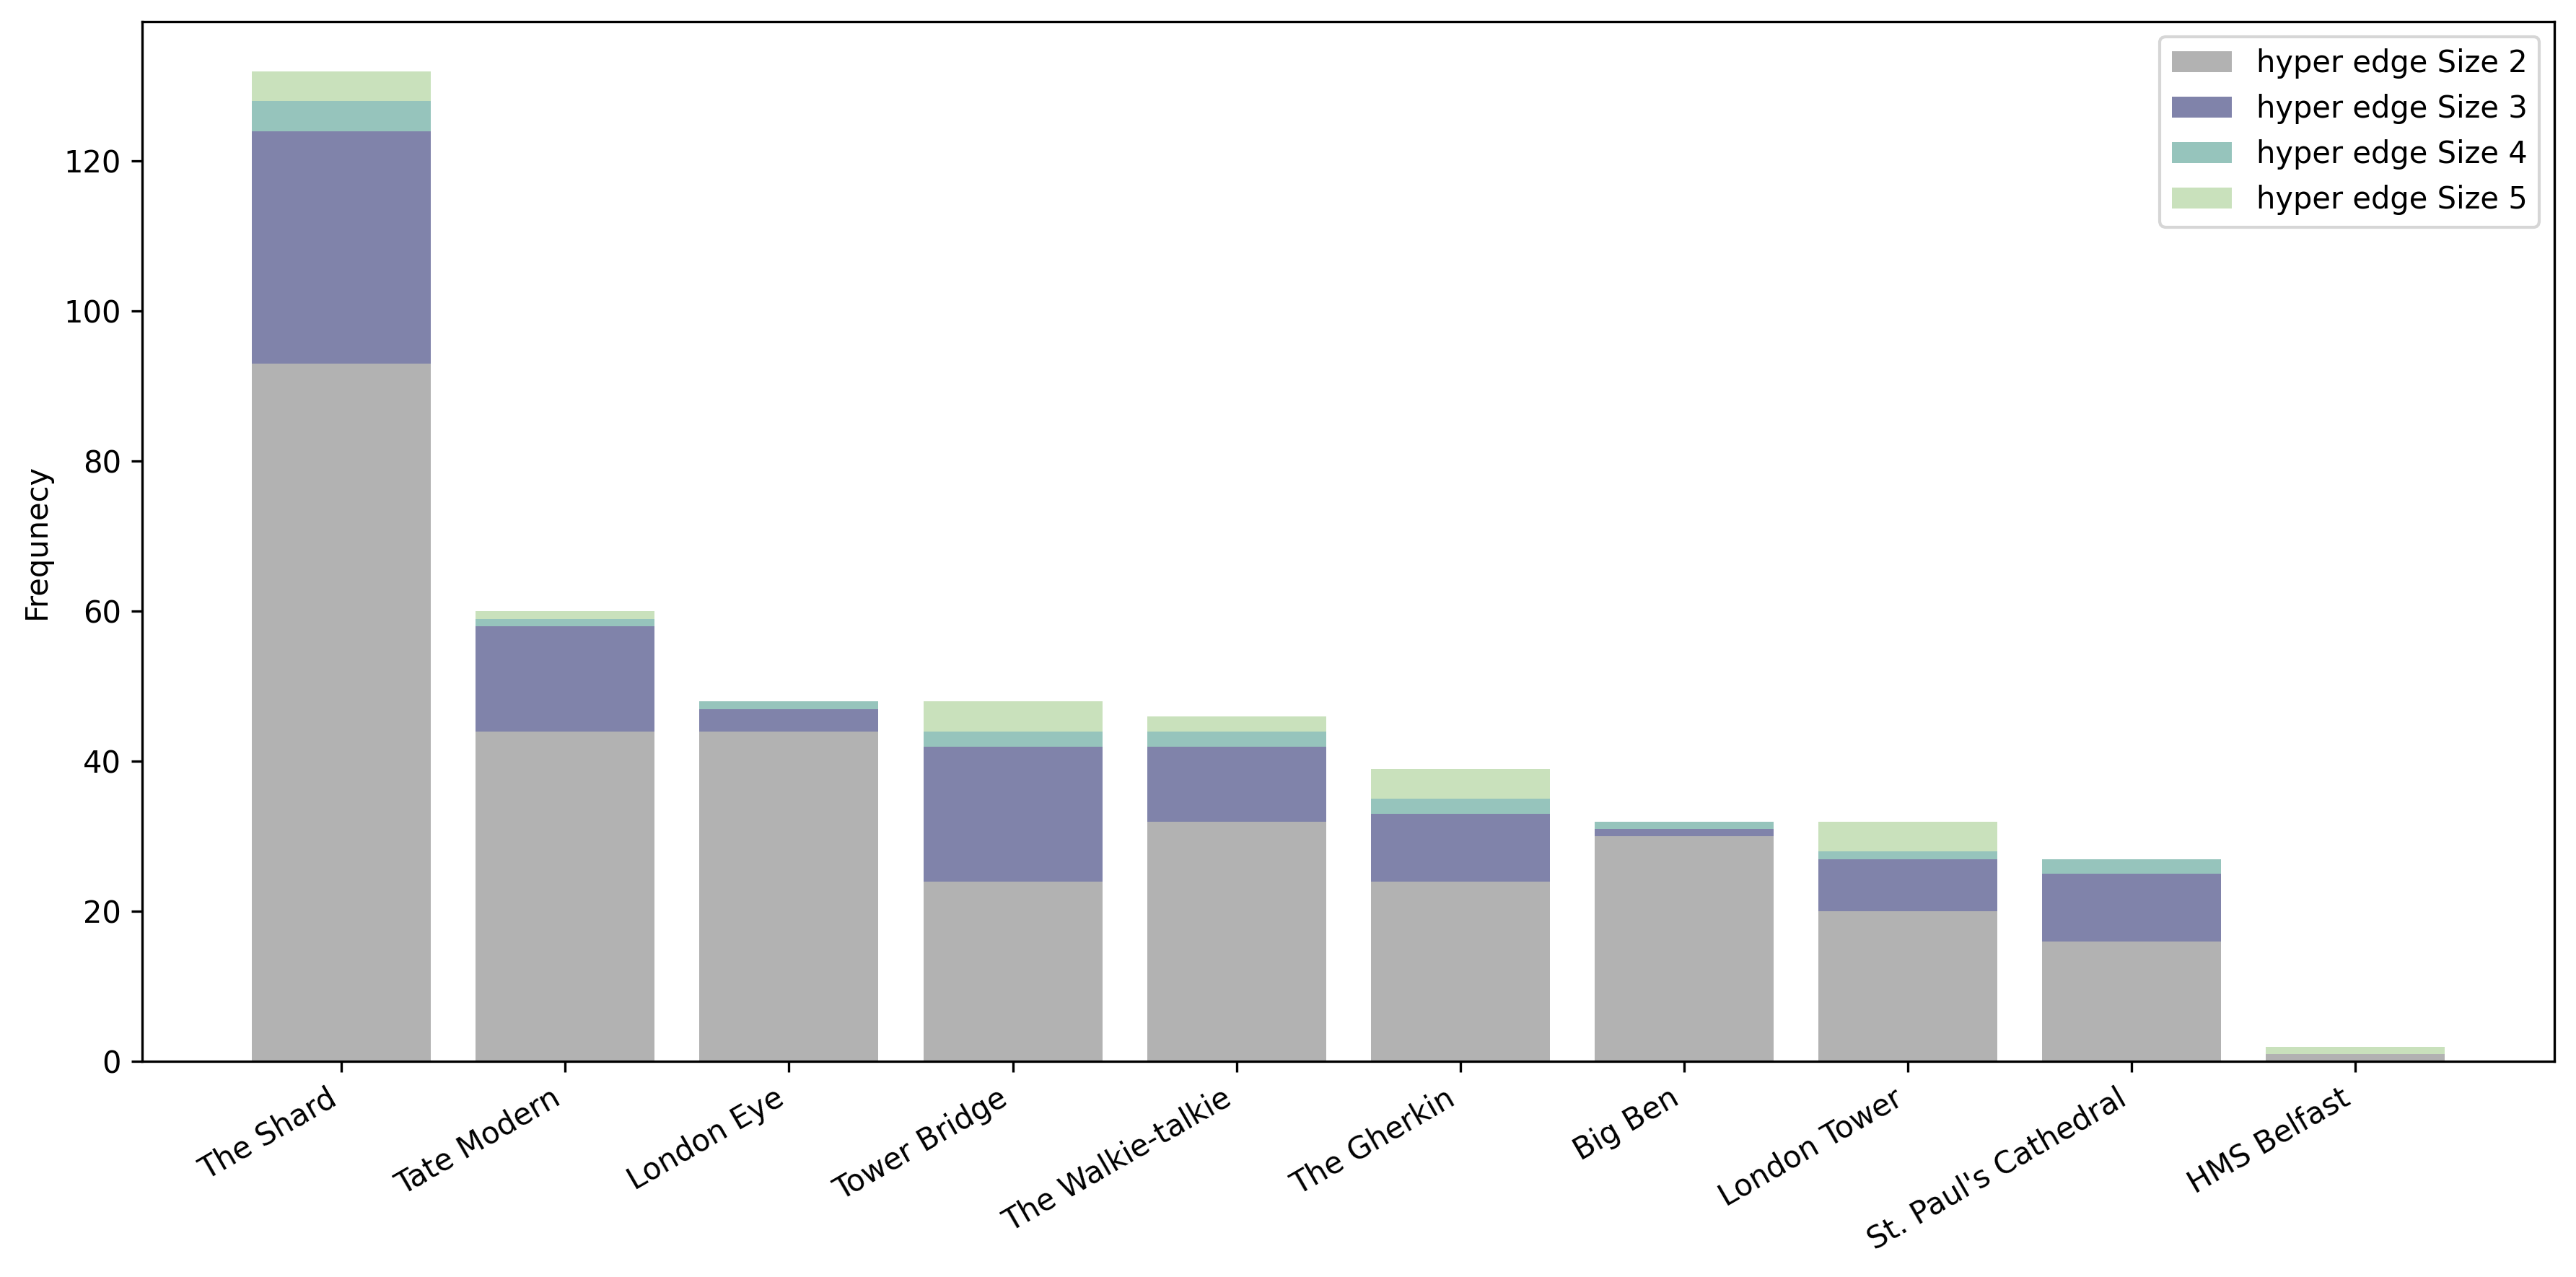

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Set hyperedge sizes to consider
desired_sizes = [2, 3, 4, 5]

# Initialize frequency dictionary for each landmark using defaultdict
# For each landmark, initialize a dictionary with hyperedge sizes as keys and 0 as initial values
landmark_counts = defaultdict(lambda: {size: 0 for size in desired_sizes})

# Iterate through hyperedges dictionary to count cumulative frequency of each landmark in different sized hyperedges
for hedge, freq in hyperedges.items():
    s = len(hedge)
    if s in desired_sizes:
        for landmark in hedge:
            landmark_counts[landmark][s] += freq

# Get list of all landmarks that appeared
landmarks = list(landmark_counts.keys())

# Sort landmarks by total frequency across all sizes in descending order for better visualization
landmarks.sort(key=lambda x: sum(landmark_counts[x][size] for size in desired_sizes), reverse=True)

# Prepare data: For each hyperedge size, create a list recording the frequency of each sorted landmark
data = {size: [landmark_counts[node][size] for node in landmarks] for size in desired_sizes}

# Create stacked bar chart
x = np.arange(len(landmarks))
bar_width = 0.8

# Define colors for each layer (can be customized as needed)
# Colormap setup (replace deprecated get_cmap)
cmap = plt.colormaps['crest_r']
colors = {size: cmap(i / (len(unique_sizes) - 1)) for i, size in enumerate(unique_sizes)}
colors[3] = colors[2]
colors[2] = 'grey'
 
fig, ax = plt.subplots(figsize=(12, 6), dpi=300)
bottom = np.zeros(len(landmarks))  # Bottom data for stacking

# Stack bars for each hyperedge size
for size in desired_sizes:
    counts = np.array(data[size])
    ax.bar(x, counts, bar_width, bottom=bottom, label=f"hyper edge Size {size}", color=colors[size], alpha=0.6)
    bottom += counts  # Accumulate bottom height
    
landmarks = [query_images[i]['name'] for i in landmarks]
ax.set_xticks(x)
ax.set_xticklabels(landmarks, rotation=30, ha='right')
ax.set_ylabel("Frequency")
#ax.set_title("Frequency of Landmark under Each Hyper Edge Type")
ax.legend()

plt.tight_layout()
plt.savefig("report\images\hyper_edge_count.png", dpi=300, bbox_inches='tight')
plt.show()
